<a href="https://colab.research.google.com/github/silvestriniluca/SAMnet/blob/main/SingleTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_addons
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Activation, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,Callback
from tensorflow.keras.losses import binary_crossentropy, mean_squared_error
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow_addons as tfa

In [ ]:
class Utility():



  def __init__(self,path,batch_size,step_size,crop):
    self.__path=path
    self.__batch_size=batch_size
    self.__step_size=step_size
    self.__crop=crop
    self.__dataframe=Utility.load_data(self)
    self.__dataframe_val=Utility.load_data_validation(self)



  def load_data(self):

      df = pd.read_csv(self.__path,header=0,delimiter=",",nrows=int(self.__crop *0.7))

      print(df)
      return df

  def load_data_validation(self):

      df = pd.read_csv(self.__path,header=0,delimiter=",")
      # Calcola il numero totale di righe nel dataset
      total_rows = len(df)

      # Calcola il numero di righe da prendere
      num_rows_to_take = int(total_rows * 0.1)

      # Prendi solo le ultime righe del dataset
      df_last_samples = df.tail(num_rows_to_take)

      print(df_last_samples)
      return df_last_samples


  def load_testdata(path):
      df = pd.read_csv(path,header=0,delimiter=",",nrows=100000)

      print(df)
      return df


  def add_plot(ax, x, y, label):
    ax.plot(x, y, label=label)
    return ax

  def plotting_utility(x_data,y_data,labels):
      # Aggiunta del primo grafico alla figura
      #Utility.ax.plot(x, y, label='Grafico Casuale')
      # Aggiungi grafici con i dati forniti

      for x, y, label in zip(x_data, y_data, labels):
          print(labels + "testtttttt")
          Utility.ax=Utility.add_plot(Utility.ax, x, y, label)

          # Impostazioni aggiuntive per la figura
          #ax.set_title('Grafici Multipli')
          #ax.legend()

              # Impostazioni aggiuntive per la figura
          Utility.ax.set_title('Grafici Multipli')
          Utility.ax.legend()

          # Visualizzazione della figura
          plt.show()

#loss: 0.0714 - classification_output_loss: 0.1346 - output_model_loss: 0.0042 - classification_output_mse: 0.0295 - output_model_mse: 0.0042 - val_loss: 0.0187 - val_classification_output_loss: 0.0000e+00 - val_output_model_loss: 0.0187 - val_classification_output_mse: 0.0000e+00 - val_output_model_mse: 0.0187
  def plot_training_results(training_history):
          plt.figure()
          plt.plot(training_history.history["loss"], label="MSE (Training Loss)", color='red')
          #plt.plot(training_history.history["val_loss"], label="MSE (Validation Loss)",color='blue')
          plt.title('Training History')
          plt.ylabel('Loss')
          plt.xlabel('Epoch')
          plt.legend()
          plt.show()
          #plt.figure()
          #plt.plot(training_history.history["classification_output_loss"], label="Classification Loss", color='red')
          #plt.plot(training_history.history["output_model_loss"], label="Loss Regression", color='blue')
          #plt.title('Training History')
          #plt.ylabel('Loss')
          #plt.xlabel('Epoch')
          #plt.legend()
          #plt.show()

  def save_model(path_tosavemodel,model):
    model_path = path_tosavemodel



    if not os.path.exists (model_path):
            open((model_path), 'a').close()

    model.save(model_path)
    # Calcolo delle dimensioni del file in MB
    size_in_bytes = os.path.getsize(model_path)
    size_in_mb = size_in_bytes / (1024 * 1024)  # Converti byte in MB
    print("Dimensione del modello in MB:", size_in_mb)
    print("model salvato")

  def load_dataset_test(self, directory):

        #self.__window_offset=0
        data_frame = pd.read_csv(directory, nrows=921600, skiprows=0, header=0)
        test_input = np.round(np.array(data_frame.iloc[:, 1], float), 6)
        test_target = (np.round(np.array(data_frame.iloc[:, 2], float), 6))

        del data_frame

        return test_input, test_target


  def batch_generator(self):

    #inputs_val = np.array(self.__dataframe['aggregate'])
    #outputs_val = np.array(self.__dataframe['data_appliance'])
    inputs_val = np.array(self.__dataframe.iloc[:, 0])  # Seconda colonna
    outputs_val = np.array(self.__dataframe.iloc[:, 1])  # Terza colonna

    inputs_normalization = inputs_val / np.max(inputs_val)
    outputs_normalization = outputs_val / np.max(outputs_val)

    plt.plot(inputs_normalization)
    plt.plot(outputs_normalization)
    plt.show()
    print('inputttt',inputs_normalization)
    print('outputtt',outputs_normalization)
    maximum_batch_size = inputs_normalization.size


    indices = np.arange(maximum_batch_size)
    np.random.shuffle(indices)  # Mescola gli indici

    num_samples = len(inputs_val)
    step = 1
    start_index = 0

    while True:
        end_index = start_index + (self.__batch_size * step)
        if end_index >= num_samples:
            start_index = 0
            end_index = start_index + (self.__batch_size * step)

            # Rimescola gli indici per ogni nuova epoca
            np.random.shuffle(indices)

        batch_indices = indices[start_index:end_index:step]
        input_data = inputs_normalization[batch_indices].reshape((-1, 1))
        output_data = outputs_normalization[batch_indices].reshape((-1, 1))

        # Incrementa l'indice di inizio per la prossima iterazione
        start_index +=  self.__step_size

        yield input_data, output_data

  def check(self):

    inputs_val=np.array(self.__dataframe['aggregate'])
    outputs_val= np.array(self.__dataframe['data_appliance'])

    inputs_normalization=inputs_val/(max(inputs_val))
    outputs_normalization=outputs_val/(max(outputs_val))
    plt.plot(inputs_normalization)
    plt.plot(outputs_normalization)
    plt.show()
    print('inputttt',inputs_normalization)
    print('outputtt',outputs_normalization)
    maximum_batch_size = inputs_normalization.size
    self.total_num_samples = maximum_batch_size

    indicies = np.arange(maximum_batch_size)

    indicies = np.random.shuffle(indicies)
    num_samples = len(inputs_val)
    #indices = np.arange(num_samples)
    step=1
    start_index = 0

    while True:
        end_index = start_index + (self.__batch_size * step)
        if end_index >= num_samples:
            start_index = 0
            end_index = start_index + (self.__batch_size * step)

        batch_indices = indicies[start_index:end_index:step]
        input_data = inputs_normalization[batch_indices].reshape((-1, 1))
        output_data = outputs_normalization[batch_indices].reshape((-1, 1))

        # Incrementa l'indice di inizio per la prossima iterazione
        start_index +=  self.__step_size

        yield input_data, output_data

  def batch_generator_validation(self):

    #inputs_val=np.array(self.__dataframe_val['aggregate'])
    #outputs_val= np.array(self.__dataframe_val['data_appliance'])

    #inputs_normalization=inputs_val/(max(inputs_val))
    #outputs_normalization=outputs_val/(max(inputs_val))

    inputs_val = np.array(self.__dataframe_val.iloc[:, 0])  # Seconda colonna
    outputs_val = np.array(self.__dataframe_val.iloc[:, 1])  # Terza colonna

    inputs_normalization = inputs_val / np.max(inputs_val)
    outputs_normalization = outputs_val / np.max(outputs_val)

    plt.plot(inputs_normalization)
    plt.plot(outputs_normalization)
    plt.show()
    print('input validation',inputs_normalization)
    print('output validation',outputs_normalization)

    num_samples = len(inputs_val)
    indices = np.arange(num_samples)

    start_index = 0
    while start_index < num_samples:
        end_index = min(start_index + self.__batch_size, num_samples)

        batch_indices = indices[start_index:end_index]
        input_data = inputs_normalization[batch_indices].reshape((-1, 1))
        output_data = outputs_normalization[batch_indices].reshape((-1, 1))

        start_index += self.__step_size  # Avanza all'indice successivo

        yield input_data, output_data




  def batch_generator_stateoutput(inputs_val, outputs_val, batch_size, step_size, move_by):

    num_samples = len(inputs_val)
    indices = np.arange(num_samples)
    inputs_val=np.array(df['aggregate']).reshape(-1,1)
    outputs_val= np.array(df['data_appliance']).reshape(-1,1)


    start_index = 0
    num_windows = (num_samples - batch_size * step_size + move_by) // move_by
    while True:
        end_index = start_index + (batch_size * step_size)
        if end_index >= num_samples:

            start_index = 0
            end_index = start_index + (batch_size * step_size)

        batch_indices = indices[start_index:end_index:step_size]
        input_data = inputs_val[batch_indices].reshape((-1, 1))
        output_data = outputs_val[batch_indices].reshape((-1, 1))

        state_data = np.where(output_data > 10, 1, 0)

        #state_data = []
        #for i in output_data:
        #    if i > 10:
        #        state_data.append([1])  # Qui ho modificato la struttura per essere una lista di liste
        #    else:
        #        state_data.append([0])

        #state_data = np.array(state_data)

        start_index += move_by + 600

        yield input_data, output_data, state_data, num_windows

  def input_state(data):
     input_state=[]

     data= np.array(df['data_appliance']).reshape(-1,1)
     #massimo=max(data)
     for i in data:
        if i>=10:
          input_state.append(1)
        else:
          input_state.append(0)


     input_state=np.array(input_state).reshape(-1,1)
     return input_state

  def create_datatraining(dataaggregate,data):
    percTrain=80/100
    percValidation= 20/100
    #train
    print(len(dataaggregate))
    inputs_train=dataaggregate[:(int(len(dataaggregate)*percTrain))]
    print(len(inputs_train))
    outputs_train=data[:(int(len(data)*percTrain))]
    # Restituzione dei set di addestramento
    return inputs_train, outputs_train

  def create_datavalidation(dataaggregate,data):
    percTrain=80/100
    percValidation= 20/100
    #validation
    inputs_validation=dataaggregate[int(len(dataaggregate)*percTrain):]
    outputs_validation=data[(int(len(data)*percTrain)):]
    print(len(inputs_validation))
    # Restituzione dei set di validazione
    return inputs_validation, outputs_validation


In [ ]:


from keras.callbacks import Callback

class UpdateLambdaCallback(Callback):
    def __init__(self, lambda_val):
        super(UpdateLambdaCallback, self).__init__()
        self.lambda_val = tf.Variable(lambda_val, trainable=False)

    def on_epoch_end(self, epoch, logs=None):
        # Qui puoi aggiornare il valore di lambda in base ai valori delle loss
        classification_loss = logs['classification_output_loss']
        output_loss = logs['output_model_loss']


        # Esempio di aggiornamento di lambda basato su una certa logica
        new_lambda_val = self.__update_lambda(classification_loss, output_loss)

        # Aggiorna il valore di lambda
        self.lambda_val.assign(new_lambda_val)

    def __update_lambda(self, classification_loss, output_loss):
        # Esempio di logica per aggiornare il valore di lambda
        lc = classification_loss  # Ottieni il valore della loss di classificazione
        lo = output_loss  # Ottieni il valore della loss di output

        print("Loss di classificazione (lc):", lc)
        print("Loss di output (lo):", lo)

        new_lambda = 0.8 * lo / lc
        print("Nuovo valore di lambda:", new_lambda)
        return new_lambda


In [ ]:
#What is the difference between regression and classification in Machine Learning?
#Classification and regression are machine learning tasks, but they differ in output.
#Classification predicts discrete labels or categories, while regression predicts continuous numerical values.

class TrainMain():

  def __init__(self,windowlenght,batch_size,step_size,lambda_val,learning_rate,validation_step,epochs,crop,directory_save,df_train,df_validation,
               path):
    self.__batch_size=batch_size
    self.__step_size=step_size
    self.__lambda_val=lambda_val
    self.__learning_rate=learning_rate
    self.__validation_step=validation_step
    self.__epochs=epochs
    self.__crop=crop
    self.__directory_save=directory_save
    self.__df_train=df_train
    self.__path=path
    self.__windowlenght=windowlenght
    self.__load_datatrain= Utility(self.__path,self.__windowlenght,self.__step_size,self.__crop)

    #
    #







  def experts_learner(input_data):
      # Shared Layers - Experts Learner

      #kernel size = 3????
      #TCN BLOCK
      residual = tf.keras.layers.Conv1D(1, 1)(input_data)
      # print('Residual shape:')
      # print(residual.shape)
      x1 = tfa.layers.WeightNormalization(
          tf.keras.layers.Conv1D(16, 3, padding="causal", dilation_rate=2))(input)  #_data)
      x1 = tf.keras.layers.Activation('relu')(x1)
      x1 = tf.keras.layers.Dropout(rate=0.1)(x1)
      x1 = tfa.layers.WeightNormalization(
          tf.keras.layers.Conv1D(16, 3, padding="causal", dilation_rate=2))(x1)
      x1 = tf.keras.layers.Activation('relu')(x1)
      x1 = tf.keras.layers.Dropout(rate=0.1)(x1)
      x1 = tf.keras.layers.Add()([residual, x1])

      x1 = tfa.layers.WeightNormalization(
          tf.keras.layers.Conv1D(32, 3, padding="causal", dilation_rate=4))(input)  #_data)
      x1 = tf.keras.layers.Activation('relu')(x1)
      x1 = tf.keras.layers.Dropout(rate=0.1)(x1)
      x1 = tfa.layers.WeightNormalization(
          tf.keras.layers.Conv1D(32, 3, padding="causal", dilation_rate=4))(x1)
      x1 = tf.keras.layers.Activation('relu')(x1)
      x1 = tf.keras.layers.Dropout(rate=0.1)(x1)
      x1 = tf.keras.layers.Add()([residual, x1])

      x1 = tfa.layers.WeightNormalization(
          tf.keras.layers.Conv1D(64, 3, padding="causal", dilation_rate=8))(input)  #_data)
      x1 = tf.keras.layers.Activation('relu')(x1)
      x1 = tf.keras.layers.Dropout(rate=0.1)(x1)
      x1 = tfa.layers.WeightNormalization(
          tf.keras.layers.Conv1D(64, 3, padding="causal", dilation_rate=8))(x1)
      x1 = tf.keras.layers.Activation('relu')(x1)
      x1 = tf.keras.layers.Dropout(rate=0.1)(x1)
      x1 = tf.keras.layers.Add()([residual, x1])

      xout = tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation='relu', name="CONV1_FINAL")(x1)
      # Configurazione del blocco residuo


      return xout

  def gateA(input_data):
      # Gate nodes (T,E)
      fc_layer = tf.keras.layers.Dense(units=4, name='gateA')(input_data)  # units = 4
      gate_output = tf.keras.layers.Softmax()(fc_layer)

      return gate_output

  def gateB(input_data):
      # Gate nodes (T,E)
      fc_layer = tf.keras.layers.Dense(units=4, name='gateB')(input_data)  # units = 4
      gate_output = tf.keras.layers.Softmax()(fc_layer)

      return gate_output



  def self_attention(gate_output, shared_experts):
    # Self-Attention
    query = gate_output
    key = tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation='relu')(shared_experts)
    value = tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation='relu')(shared_experts)
    #key=shared_experts
    #value=shared_experts

    key_transformed = tf.keras.layers.Dense(units=4)(key) #4
    # Compute attention weights
    attention_weights = tf.linalg.matmul(query, key_transformed, transpose_b=True)
    attention_weights = tf.nn.softmax(attention_weights, axis=-1)

    # Apply attention weights to value
    scaled_dot_product_attention = tf.linalg.matmul(attention_weights, value)

    # Global average pooling
    self_attention_output = tf.reduce_mean(scaled_dot_product_attention, axis=1)

    return self_attention_output

#Tower A
  def towerA(self_attention_output):
      # Tower
      fc_layer = tf.keras.layers.Dense(units=2400)(self_attention_output)
      output = tf.keras.layers.Dense(units=600, activation='sigmoid', name="classification_output")(fc_layer)

      return output

  def towerB(self_attention_output):
      # Tower ###non è classification ma regression
      fc_layer = tf.keras.layers.Dense(units=2400)(self_attention_output)
      output = tf.keras.layers.Dense(units=600 , name="regression_output")(fc_layer)

      return output


  def binary_crossentropy(y_true, y_pred):
      y_true = tf.cast(y_true, tf.float32)
      loss = K.binary_crossentropy(y_true,y_pred)

      return tf.reduce_mean(loss)
      #return tf.keras.losses.binary_crossentropy(y_true, y_pred)
  def MSE_loss_function(y_true, y_pred):

      y_true = tf.cast(y_true, tf.float32)
      mse = tf.losses.mean_squared_error(y_true, y_pred)
      return tf.reduce_mean(mse)
      #return tf.keras.losses.mean_squared_error(y_true, y_pred)

  def get_losses(epoch, logs):
        classification_loss = logs['classification_output_loss']
        output_loss = logs['output_model_loss']
        return classification_loss,output_loss


  def train_model(self,model):



      # Define early stopping callback
      early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

      tf.keras.backend.clear_session()

      optimizer = Adam(learning_rate=self.__learning_rate)
      # Utilizzo della callback

      lambda_callback = UpdateLambdaCallback(self.__lambda_val)
      result = self.__load_datatrain.batch_generator()
      for input, output in result:
          print("ingresso di shape ", input.shape)
          print("output di shape", output.shape)
          break  # interrompe il loop dopo la prima iterazione per considerare solo il primo batch
      model.compile(optimizer=optimizer,
                       loss=['mean_squared_error']
                  , loss_weights=[1] , metrics=['mse'])

      taining_history= model.fit(self.__load_datatrain.batch_generator(),
                                 steps_per_epoch=self.__crop/(self.__batch_size*self.__step_size),
                                 validation_data=self.__load_datatrain.batch_generator_validation(),
                                 validation_steps=self.__validation_step,
                                 verbose=1, epochs=self.__epochs,
                                 batch_size=self.__batch_size,
                                 callbacks=[early_stopping])
                                 #callbacks=[lambda_callback])
#,steps_per_epoch=self.__crop // (self.__batch_size * self.__step_size)


      Utility.plot_training_results(taining_history)

  def train_main(self,input_window_length=600):
    # Input
    input_layer = tf.keras.layers.Input(shape=(input_window_length,))
    input_data = tf.keras.layers.Reshape((input_window_length,1 ))(input_layer)
    #input_shape = (600, )
    #input_data = tf.keras.layers.Input(shape=input_shape)

    # Energy Disaggregation Branch
    shared_experts_energy = TrainMain.experts_learner(input_data)
    energy_gate = TrainMain.gateB(input_data)
    energy_self_attention= tf.keras.layers.Attention()(
    [energy_gate, shared_experts_energy])
    #attention_layer = Attention(use_scale=True, score_mode="dot", dropout=0.1)
    #energy_self_attention = attention_layer([energy_gate, shared_experts_energy])
    #considero gate + TCN
    #outputmatmul = tf.linalg.matmul(energy_gate, shared_experts_energy, transpose_b=True)

    #energy_self_attention = TrainMain.self_attention(energy_gate, shared_experts_energy)
    #energy_self_attention_reduce = tf.reduce_mean(energy_self_attention, axis=2)

    energy_output = TrainMain.towerB(energy_self_attention)
    #energy_output=TrainMain.towerB(shared_experts_energy)
    #energy_output=outputmatmul





    yout = energy_output





    #outputs=[state_output, yout])
    # Build the model
    model = tf.keras.models.Model(inputs=input_data, outputs=yout)
    model.summary()
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
    # Compile the model


    path_savemodel='/content/drive/MyDrive/Samnet/NetworkSamNet_model.h5'
    Utility.save_model(path_savemodel,model)
    optimizer = Adam(learning_rate=self.__learning_rate)

    TrainMain.train_model(self,model)





      #y_true=input_datay_pred=state_output*energy_output


In [ ]:
#pathtrain='/content/drive/MyDrive/dishwasher_Aggregate_GroundTruth_train.csv'
#pathtrain='/content/drive/MyDrive/dishwasher_NormalizeAggregate_GroundTruth_train_Ultimate.csv'
appliance_name= "dishwasher"
pathtrain = "/content/drive/MyDrive/"+ appliance_name +"/" + appliance_name +"/"+ appliance_name + "_training_.csv"
utility = Utility(path=pathtrain,
                 batch_size=600,
                  step_size=32,crop=
                  700000)

df=utility.load_data()



model=Model()
training= TrainMain(windowlenght=600,batch_size=128,step_size=32,lambda_val=0.5,learning_rate=0.005,validation_step=10,
                    epochs=50, crop= 700000,
                    directory_save='/content/drive/MyDrive/Samnet/NetworkSamNet_model.h5',
                    df_train=df,df_validation=df,path=pathtrain)


training.train_main()


#load_data.load_data()

        0.39756381511673256  0.0002516989680342311
0                  0.361882               0.000252
1                  0.399663               0.000252
2                  0.370278               0.000252
3                  0.391267               0.000252
4                  0.359783               0.000252
...                     ...                    ...
489994             0.196068               0.000252
489995             0.202364               0.000252
489996             0.185573               0.000252
489997             0.905502               0.000252
489998             0.899205               0.000252

[489999 rows x 2 columns]
         0.39756381511673256  0.0002516989680342311
955115              0.953777               0.030456
955116              0.966371               0.030456
955117              0.953777               0.030707
955118              0.947481               0.030456
955119              0.939085               0.030456
...                      ...                    .

TypeError: 'NoneType' object is not subscriptable

In [ ]:
pip install tensorflow_model_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 4.3 MB/s eta 0:00:00


       -0.11754157359135237  0.0002522704339051463
0                 -0.117542               0.000252
1                 -0.113150               0.000252
2                 -0.117542               0.000252
3                 -0.117542               0.000252
4                 -0.121933               0.000252
...                     ...                    ...
69995             -0.262474               0.000252
69996             -0.258082               0.000252
69997             -0.258082               0.000252
69998             -0.262474               0.000252
69999             -0.269061               0.000252

[70000 rows x 2 columns]
         -0.11754157359135237  0.0002522704339051463
1551454             -0.396426               0.000252
1551455             -0.242710               0.000252
1551456             -0.271257               0.000252
1551457             -0.275649               0.000252
1551458             -0.260278               0.000252
...                       ...               

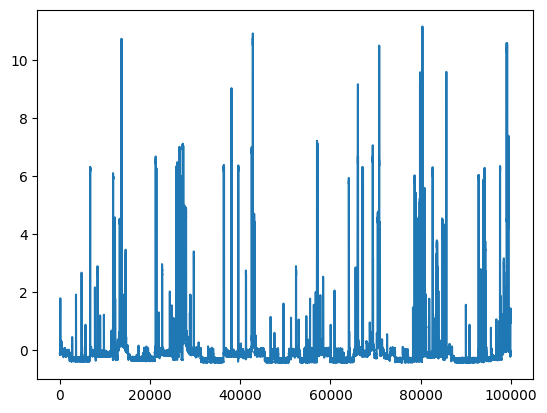

input (100000,)
target (100000,)
PATH NAME:  /content/drive/MyDrive/Samnet/NetworkSamNet_model.h5


Loaded model with  1470504  weights
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 600, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 600, 1)               2         ['input_2[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 600, 16)              64        ['conv1d[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 600, 16)              64        ['conv1d_1[0][0]']            
 Normalization)                                         

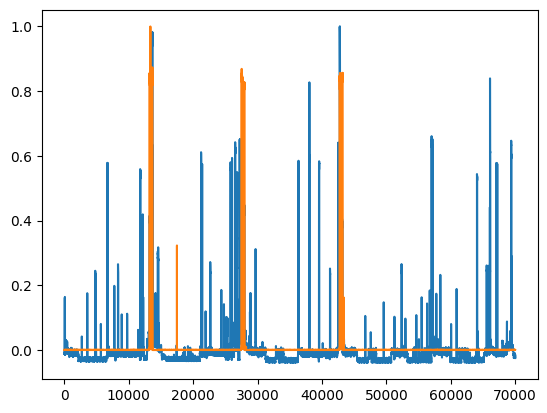

inputttt [-0.01075165 -0.01034992 -0.01075165 ... -0.023607   -0.02400873
 -0.02461132]
outputtt [0.00041859 0.00041859 0.00041859 ... 0.00041859 0.00041859 0.00041859]
32/32 - 1s - 702ms/epoch - 22ms/step


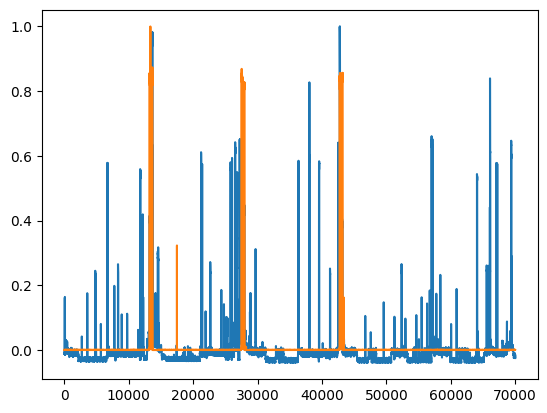

inputttt [-0.01075165 -0.01034992 -0.01075165 ... -0.023607   -0.02400873
 -0.02461132]
outputtt [0.00041859 0.00041859 0.00041859 ... 0.00041859 0.00041859 0.00041859]
600/600 [==============================] - 14s 21ms/step - loss: 0.0135 - mae: 0.0135
denormalizzazione: 6368
testing_history [[[ 3.69094050e-06 -4.45282058e-06  1.52926732e-05 ...  2.04895205e-05
    2.26914854e-05 -4.66839520e-05]]

 [[-2.41944399e-05  7.17674848e-05 -3.72094582e-05 ... -6.42305749e-05
    7.33445777e-05 -5.41385543e-06]]

 [[-4.53861361e-07  1.34627589e-06 -6.98005920e-07 ... -1.20489233e-06
    1.37586039e-06 -1.01557475e-07]]

 ...

 [[ 6.80605262e-06 -8.21099366e-06  2.81995563e-05 ...  3.77824908e-05
    4.18429117e-05 -8.60847358e-05]]

 [[ 4.46972081e-06 -5.39232769e-06  1.85193658e-05 ...  2.48127108e-05
    2.74793056e-05 -5.65340597e-05]]

 [[-1.24354472e-07  3.68869706e-07 -1.91248532e-07 ... -3.30131627e-07
    3.76975805e-07 -2.78261467e-08]]]
testing_history * max [[[ 2.3503909e-02 -2.83

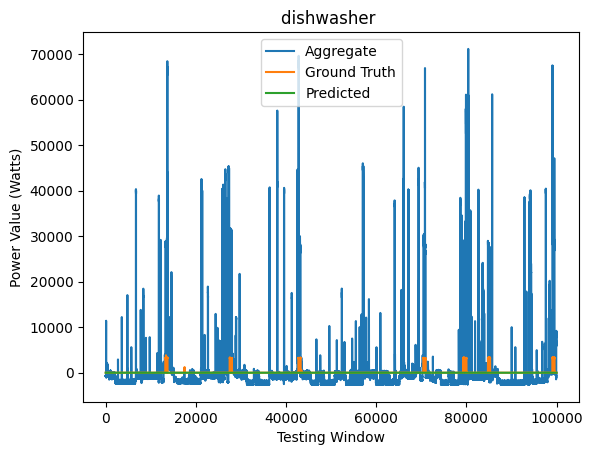

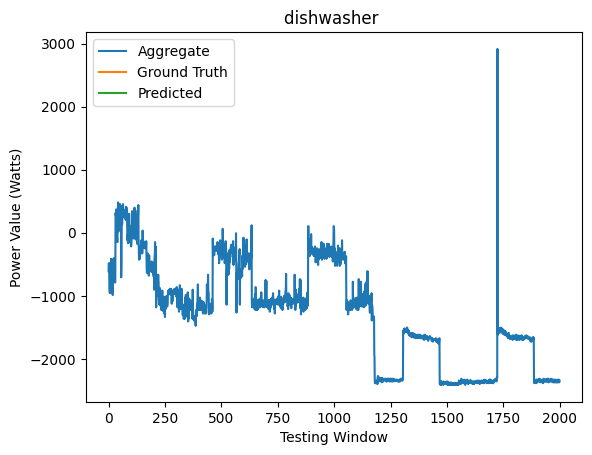

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

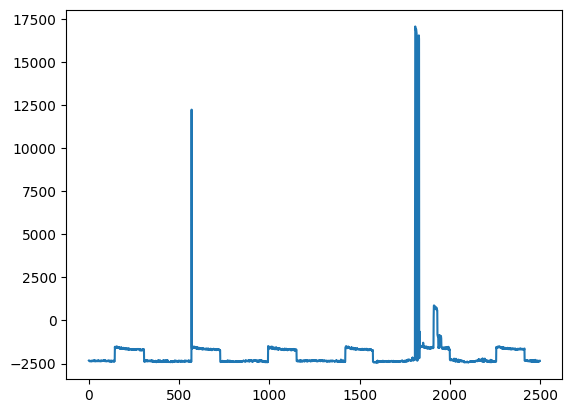

In [ ]:
import tensorflow as tf
import tensorflow
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.layers import Dense
import os
import matplotlib.pyplot as plt
import time
import tensorflow_model_optimization as tfmot

from ukdale_parametersSamnet import mains_data, params_appliance





class Tester():

  def __init__(self, dataset, appliance,
                 save_init_path, crop, batch_size,
                 network_type, test_directory,
                 input_window_length,saved_model_dir):
        self.__dataset = dataset
        self.__appliance = appliance
        self.__save_init_path = save_init_path
        self.__network_type = network_type
        self.__crop = 100000
        self.__batch_size = batch_size
        self.__input_window_length = input_window_length
        self.__test_directory = test_directory
        self.__saved_model_dir=saved_model_dir
        self.__load_datatest= Utility(self.__test_directory,600,32,self.__crop)
        #self.data_input_test = DataFrame(dataset,'test','input')
        #self.data_output_test = DataFrame(dataset,'test','output')
        #self.data_state_output_test = DataFrame(dataset,'test_state_output','state_output')

  def f1(prediction, true):
            epsilon = 1e-8
            TP = epsilon
            FN = epsilon
            FP = epsilon
            TN = epsilon
            for i in range(len(prediction)):
                if prediction[i] >= 0.5:
                    prediction_binary = 1
                else:
                    prediction_binary = 0
                if prediction_binary == 1 and true[i] == 1:
                    TP += 1
                elif prediction_binary == 0 and true[i] == 1:
                    FN += 1
                elif prediction_binary == 1 and true[i] == 0:
                    FP += 1
                elif prediction_binary == 0 and true[i] == 0:
                    TN += 1
            R = TP / (TP + FN)
            print("recall:", R)
            P = TP / (TP + FP)
            print("precision:", P)
            f1 = (2 * P * R) / (P + R)
            return f1


  def load_model(saved_model_dir):

    #model_name = "saved_models/" + appliance + "_" + algorithm + "_" + network_type + "_model.h5"
    model_name = saved_model_dir
    print("PATH NAME: ", model_name)

    model = tf.keras.models.load_model(model_name)
    num_of_weights = model.count_params()
    print("Loaded model with ", str(num_of_weights), " weights")
    return model

  def load_dataset(self, directory):


        data_frame = pd.read_csv(self.__test_directory, nrows=100000, skiprows=0, header=0)
        test_input = np.array(data_frame.iloc[:, 0], float)
        test_target = (np.round(np.array(data_frame.iloc[:, 1], float), 6))

        del data_frame

        return test_input, test_target

  def test_model(self):


        test_input, test_target = Tester.load_dataset(self,self.__test_directory)
        plt.plot(test_input)
        plt.show()
        print("input",test_input.shape)
        print("target",test_target.shape)
        batch_size = 128
        step_size = 1

        #dftest= Utility.load_testdata(self.__test_directory)
        #test_input=np.array(dftest['aggregate']).reshape(-1,1)
        #test_target= np.array(dftest['data_appliance']).reshape(-1,1)

        model = Tester.load_model('/content/drive/MyDrive/Samnet/NetworkSamNet_model.h5')


        model.summary()
        print("type of model:", type(model))

        model.summary()
        print("type of model:", type(model))


        test_generator= self.__load_datatest.batch_generator()

        #test_generator=Def_Input_Output.def_input_output(test_input,test_target)
        #test_input =  np.array(self.data_input_test.get_testvalue())
        #test_target= {'state_output': np.array(self.data_state_output_test.get_testvalue()), 'yout': np.array(self.data_output_test.get_testvalue())}

        steps_per_test_epoch =  1

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae", metrics=["mae"])

        # Test the model.

        testing_history = model.predict(test_generator,
                                        steps=32, verbose=2)
        target_generator=Tester.batch_generator_input(test_target)


        test_generator_controllo= self.__load_datatest.batch_generator()

        input_data_generator=[]
        target_data_generator=[]
        for input in range(19200):
          input_data, target_data= next(test_generator_controllo)
          target_data_generator.append(target_data)
          input_data_generator.append(input_data)



        np.save("output.npy",testing_history,allow_pickle=True)
        np.save("target.npy",target_data_generator)

        target_data_generator = np.transpose(target_data_generator, (0, 2, 1))
                #print("training", input_data.shape)
                #print("training", output_data.shape)
                #print("input", state_data.shape)
        #print("gennnn",input_data_generator.shape)
        #print("shape",target_data_generator.shape)
        #for i in target_generator:
            # plt.plot(target[i])
        #    plt.plot(i)
        #    plt.show()
        #    print(i.shape)
        evaluation_metrics = model.evaluate(np.array(input_data_generator), np.array(target_data_generator))


        Tester.plot_results(self,testing_history, test_input,test_target)




  def batch_generator_input(test_input):

    inputs_val = np.array(test_input)


    inputs_normalization = inputs_val / np.max(inputs_val)


    plt.plot(inputs_normalization)
    plt.show()
    print('inputttt',inputs_normalization)
    maximum_batch_size = inputs_normalization.size


    indices = np.arange(maximum_batch_size)
    np.random.shuffle(indices)  # Mescola gli indici

    num_samples = len(inputs_val)
    step = 1
    start_index = 0

    while True:
        end_index = start_index + (600 * step)
        if end_index >= num_samples:
            start_index = 0
            end_index = start_index + (600 * step)

            # Rimescola gli indici per ogni nuova epoca
            np.random.shuffle(indices)

        batch_indices = indices[start_index:end_index:step]
        input_data = inputs_normalization[batch_indices].reshape((-1, 1))
        #output_data = outputs_normalization[batch_indices].reshape((-1, 1))

        # Incrementa l'indice di inizio per la prossima iterazione
        start_index +=  32

        yield input_data


  def plot_results(self, testing_history, test_input, test_target):



        #per la denormalizzazione per il max dell'aggregato che ho utilizzato per la normalizzazione

        max_=  6368
        #prendo il massimo per denormalizzare


        print("denormalizzazione:", max_)

        print("testing_history",testing_history)
        testing_history_yout = (testing_history * max_)
        print("testing_history * max",testing_history * max_)

        print("test_target_yout",test_target)
        test_target_yout = (test_target * max_)
        print("testing_history * max",test_target * max_)



        print("testing_history_yout", type(testing_history_yout))
        print("test_target_yout", type(test_target_yout))

        if not isinstance(test_target_yout, np.ndarray):
                test_target_yout = np.array(test_target_yout)

        print("test_imput_flatten",test_input.flatten())
        print("test_agg", test_input)
        test_agg = test_input * max_
        print("test_input * max_",test_agg)
        test_agg= test_agg.flatten()
        test_agg = test_agg[:(np.array(testing_history_yout.size))]
        print("test_agg =" , test_agg.shape )

        test_target_yout[test_target_yout < 0] = 0
        testing_history_yout[testing_history_yout < 0] = 0
        test_input[test_input < 0] = 0

        test_target_yout = np.array(test_target_yout)


        testing_history_yout = np.array(testing_history_yout)
        min_length = min(testing_history_yout.size, test_target_yout.size)
        output_flatten = testing_history_yout[:min_length].flatten()
        target_flatten = test_target_yout[:min_length].flatten()
        output_flatten=output_flatten[:min_length]
        #output_flatten = (testing_history_yout[:(test_target_yout.size)]).flatten()
        #target_flatten = test_target_yout[:(test_target_yout.size)].flatten()
        #target_flatten = target_flatten[:(testing_history_yout.size)]

        print("Size output:", len(output_flatten))
        print("Size target:", len(target_flatten))

        MAE_ = 0
        length = len(target_flatten)
        # Calcola la differenza assoluta

        diff = np.abs(target_flatten - output_flatten)
        MAE_ = np.sum(diff)
        MAE = MAE_ / length

        print("MAE:", MAE)


        s = np.sum(target_flatten * 6 * 1.0 / 3600.0)  #target
        s2 = np.sum(output_flatten * 6 * 1.0 / 3600.0) #predicted
        sae = np.abs(s - s2) / np.abs(s)
        print("SAE:", sae)



        print(str(self.__appliance),'threshold:', params_appliance[self.__appliance]['on_power_threshold'])

        #    TRUE POSITIVE
        assert (target_flatten.shape == output_flatten.shape)

        for i in range(len(target_flatten)):
            if target_flatten[i] < params_appliance[self.__appliance]['on_power_threshold']:
                target_flatten[i] = 0
            if target_flatten[i] >= params_appliance[self.__appliance]['on_power_threshold']:
                target_flatten[i] = 1
            if output_flatten[i] < params_appliance[self.__appliance]['on_power_threshold']:
                output_flatten[i] = 0
            if output_flatten[i] >= params_appliance[self.__appliance]['on_power_threshold']:
                output_flatten[i] = 1

        F1_Score = Tester.f1(output_flatten, target_flatten)
        print("F1 score:", F1_Score)
        print("lunghezza" , test_agg.size)
              #####################################
        Prova1=testing_history_yout[:testing_history_yout.size].reshape(-1,1)
        Prova2=test_target_yout[:testing_history_yout.size].reshape(-1,1)
        # Trasforma l'array da (19200, 1, 600) a (19200, 600)
        testing_history_yout = np.reshape(testing_history_yout, (19200, 600))

        # Appiattisce l'array in un array unidimensionale
        testing_history_yout = testing_history_yout.flatten()

        # Riduce le dimensioni a (100000,) selezionando solo i primi 100000 elementi
        testing_history_yout = testing_history_yout[:100000]
        print("PROVA1:" ,testing_history_yout.shape)
        print("PROVA3:", test_target_yout.shape)
        print("PROVA4:", test_agg.shape)
        print("PROVA2:" ,type(Prova2.shape))

              # Plot testing
        plt.figure(1)
        plt.plot(test_agg[:test_target_yout.size], label="Aggregate")
        plt.plot(test_target_yout[:test_target_yout.size].reshape(-1,1), label="Ground Truth")
        plt.plot(testing_history_yout, label="Predicted")
        plt.title(self.__appliance + " " + self.__network_type )
        plt.ylabel("Power Value (Watts)")
        plt.xlabel("Testing Window")
        plt.legend()
        plt.show()



        plt.figure(4)
        # plt.plot(test_agg[self.__window_offset: -self.__window_offset], label="Aggregate")
        plt.plot(test_agg[1000:3000], label="Aggregate")
        plt.plot(test_target_yout[:1000:3000].reshape(-1,1), label="Ground Truth")
        plt.plot(testing_history_yout[:1000:3000].reshape(-1,1), label="Predicted")
        # plt.plot(testing_history[5000:12000], label="Predicted")
        plt.title(self.__appliance + " " + self.__network_type)
        plt.ylabel("Power Value (Watts)")
        plt.xlabel("Testing Window")
        plt.legend()
        plt.show()

        plt.figure(5)
        # plt.plot(test_agg[self.__window_offset: -self.__window_offset], label="Aggregate")
        plt.plot(test_agg[3001:5500], label="Aggregate")
        plt.plot(test_target_yout[:,3001:5500].reshape(-1,1), label="Ground Truth")
        plt.plot(testing_history_yout[:,3001:5500].reshape(-1,1), label="Predicted")
        # plt.plot(testing_history[5000:12000], label="Predicted")
        plt.title(self.__appliance + " " + self.__network_type)
        plt.ylabel("Power Value (Watts)")
        plt.xlabel("Testing Window")
        plt.legend()
        plt.show()

        plt.figure(6)
        # plt.plot(test_agg[self.__window_offset: -self.__window_offset], label="Aggregate")
        plt.plot(test_agg[6501:8500], label="Aggregate")
        plt.plot(test_target_yout[6501:8500].reshape(-1,1), label="Ground Truth")
        plt.plot(testing_history_yout[6501:8500].reshape(-1,1), label="Predicted")
        # plt.plot(testing_history[5000:12000], label="Predicted")
        plt.title(self.__appliance + " " + self.__network_type )
        plt.ylabel("Power Value (Watts)")
        plt.xlabel("Testing Window")
        plt.legend()
        plt.show()

        plt.figure(7)
        # plt.plot(test_agg[self.__window_offset: -self.__window_offset], label="Aggregate")
        plt.plot(test_agg[8500:10500], label="Aggregate")
        plt.plot(test_target_yout[8500:10500].reshape(-1,1), label="Ground Truth")
        plt.plot(testing_history_yout[8500:10500].reshape(-1,1), label="Predicted")
        # plt.plot(testing_history[5000:12000], label="Predicted")
        plt.title(self.__appliance + " " + self.__network_type )
        plt.ylabel("Power Value (Watts)")
        plt.xlabel("Testing Window")
        plt.legend()
        plt.show()

        plt.figure(8)
        # plt.plot(test_agg[self.__window_offset: -self.__window_offset], label="Aggregate")
        plt.plot(test_agg[:10000], label="Aggregate")
        plt.plot(test_target_yout[:10000].reshape(-1,1), label="Ground Truth Activation")
        plt.plot(testing_history_yout[:10000].reshape(-1,1), label="Predicted Activation")
        # plt.plot(testing_history[5000:12000], label="Predicted")
        plt.title(self.__appliance + " " + "Activations" + self.__network_type)
        plt.ylabel("Power Value (Watts)")
        plt.xlabel("Testing Window")
        plt.legend()
        plt.show()






pathtest =  "/content/drive/MyDrive/"+ appliance_name +"/" + appliance_name +"/"+ appliance_name   + "_test_.csv"
#pathtest='/content/drive/MyDrive/dishwasher_NormalizeAggregate_GroundTruth_test.csv'
df_test=""

test=Tester(dataset=df_test,
            save_init_path="", crop=50, batch_size="", network_type="",
            input_window_length=600, saved_model_dir="",
            appliance="dishwasher",
            test_directory=pathtest)
test.test_model()


[[[4.18585182e-04 4.18585182e-04 4.18585182e-04 ... 4.18585182e-04
   4.18585182e-04 4.18585182e-04]]

 [[0.00000000e+00 4.18585182e-04 4.18585182e-04 ... 0.00000000e+00
   4.18585182e-04 4.18585182e-04]]

 [[0.00000000e+00 4.18585182e-04 4.18585182e-04 ... 4.18585182e-04
   4.18585182e-04 4.18585182e-04]]

 ...

 [[4.18585182e-04 4.18585182e-04 4.18585182e-04 ... 4.18585182e-04
   4.18585182e-04 0.00000000e+00]]

 [[4.18585182e-04 4.18585182e-04 4.18585182e-04 ... 4.18585182e-04
   4.18585182e-04 4.18585182e-04]]

 [[4.18585182e-04 4.18585182e-04 4.18585182e-04 ... 8.27542905e-01
   4.18585182e-04 0.00000000e+00]]]
[[[ 3.69094050e-06 -4.45282058e-06  1.52926732e-05 ...  2.04895205e-05
    2.26914854e-05 -4.66839520e-05]]

 [[-2.41944399e-05  7.17674848e-05 -3.72094582e-05 ... -6.42305749e-05
    7.33445777e-05 -5.41385543e-06]]

 [[-4.53861361e-07  1.34627589e-06 -6.98005920e-07 ... -1.20489233e-06
    1.37586039e-06 -1.01557475e-07]]

 ...

 [[ 6.80605262e-06 -8.21099366e-06  2.81995

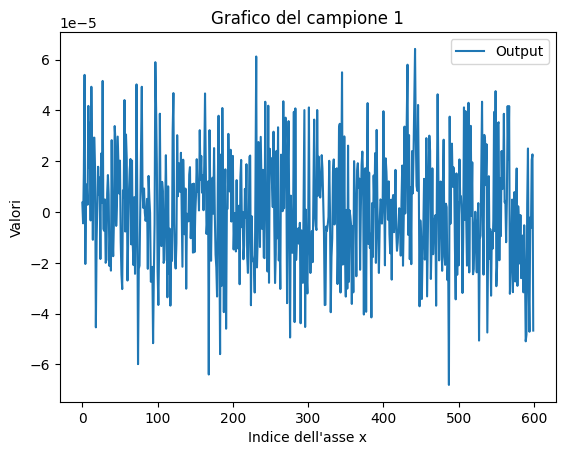

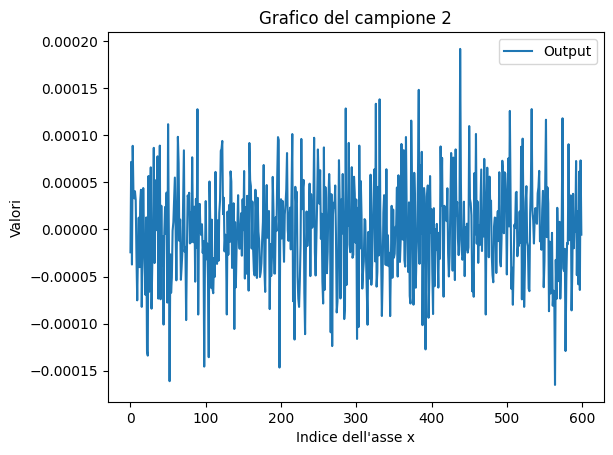

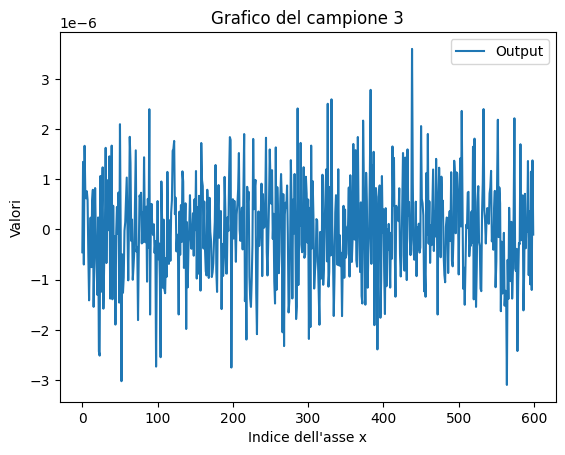

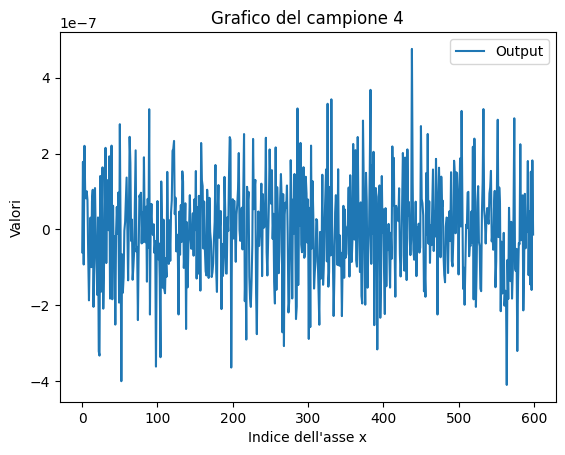

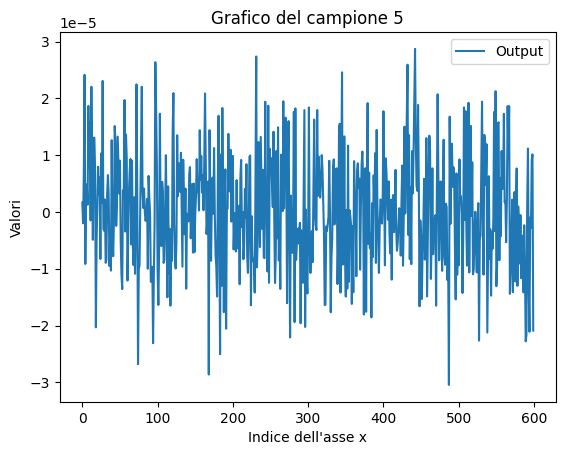

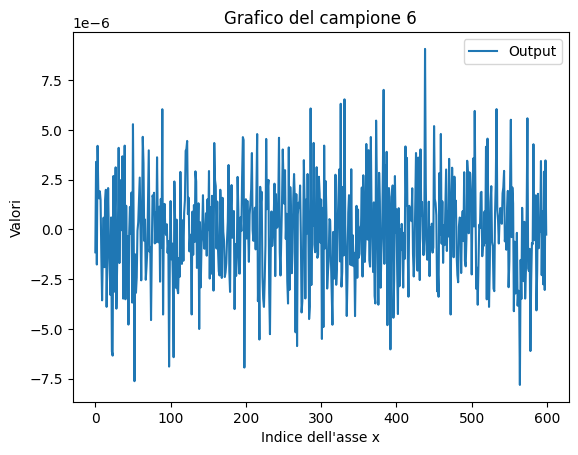

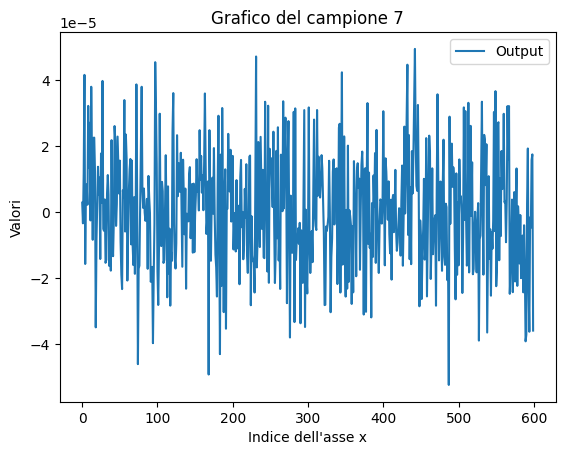

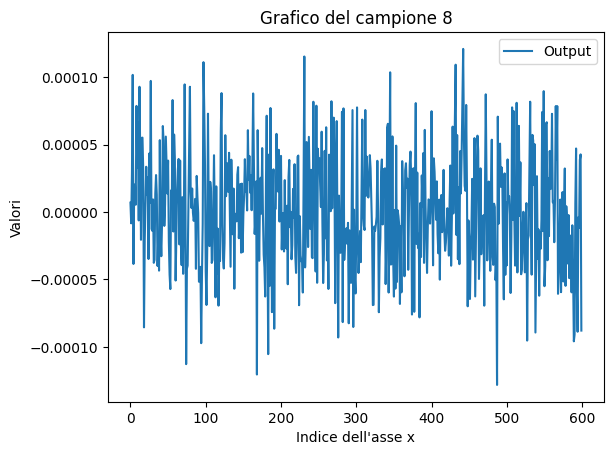

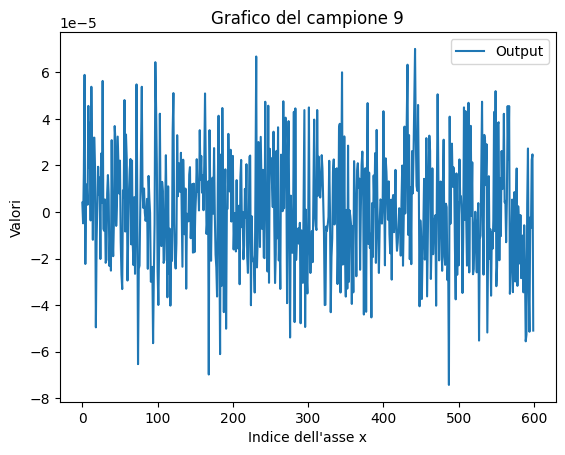

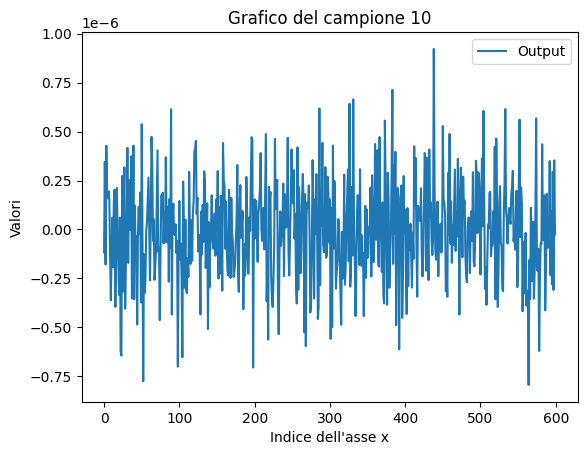

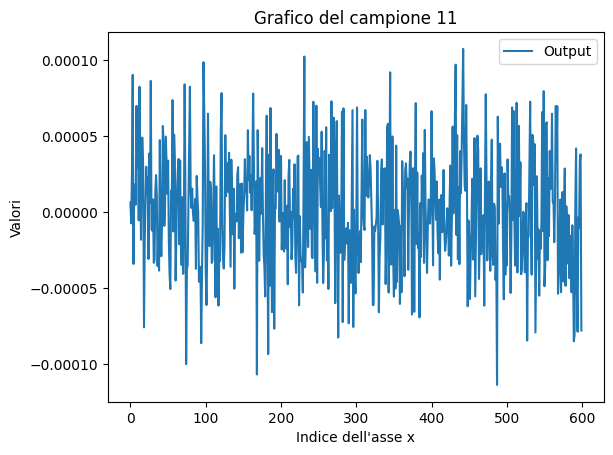

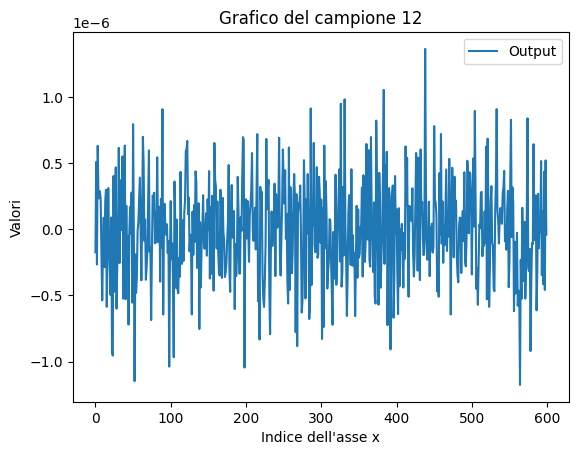

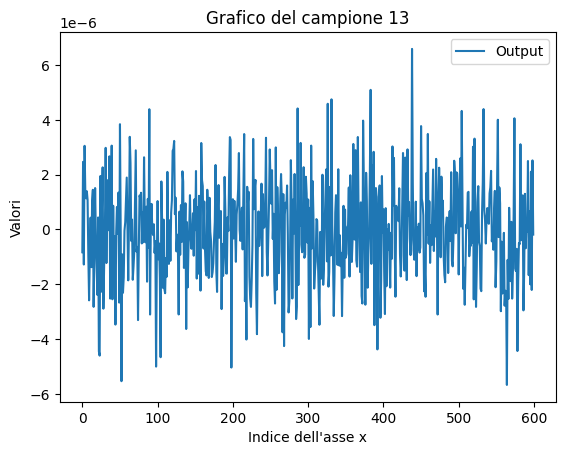

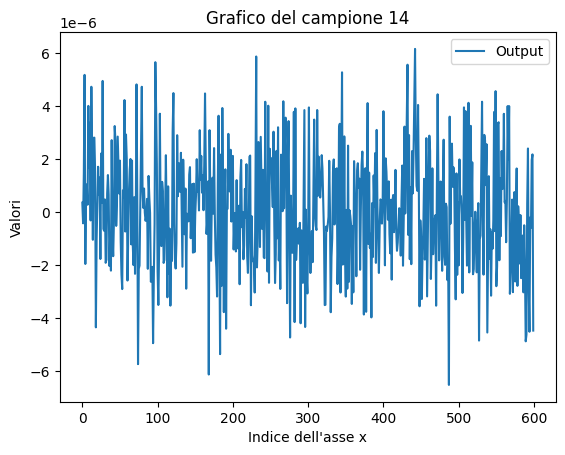

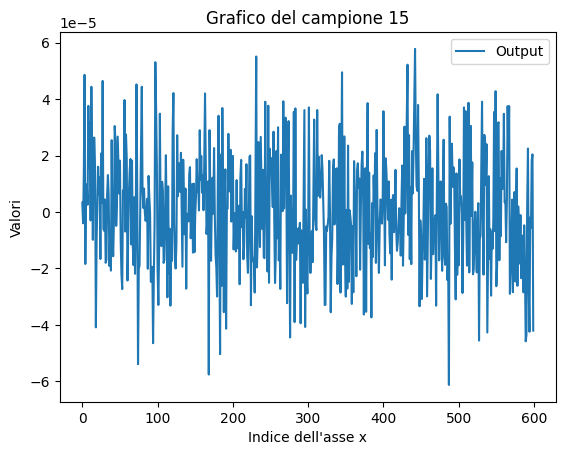

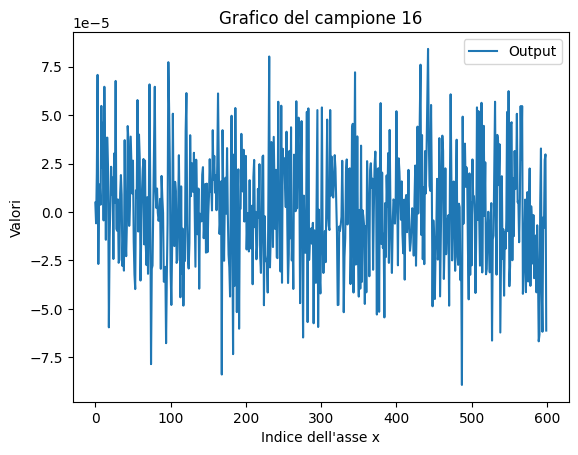

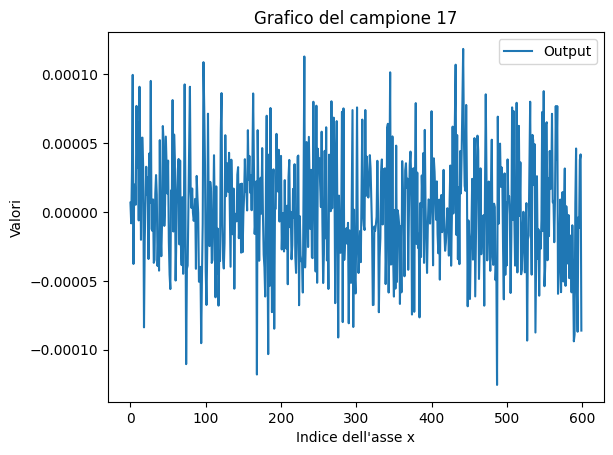

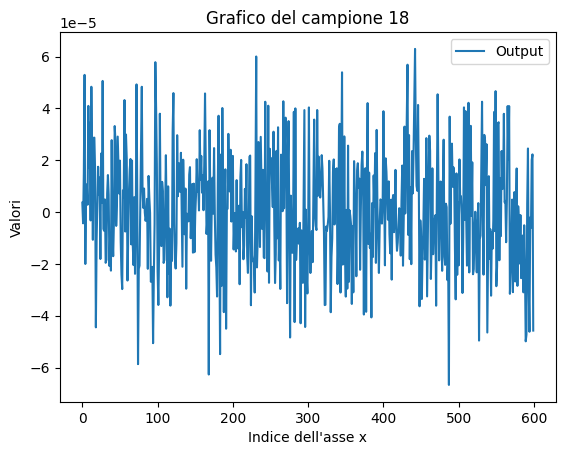

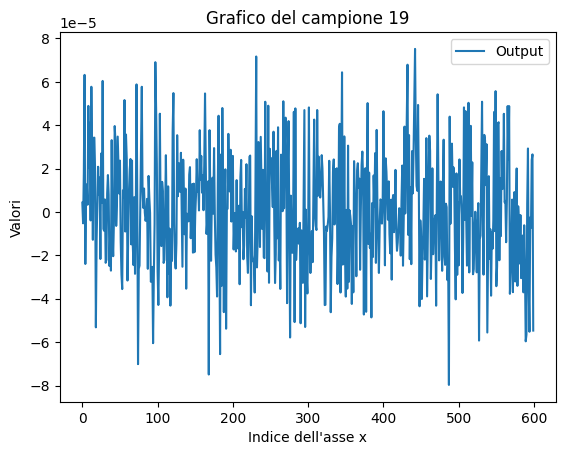

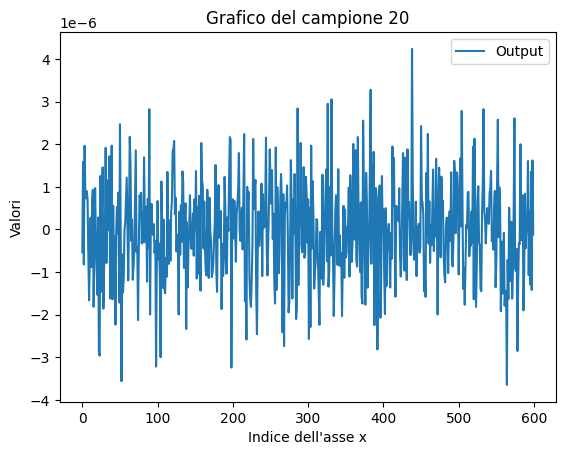

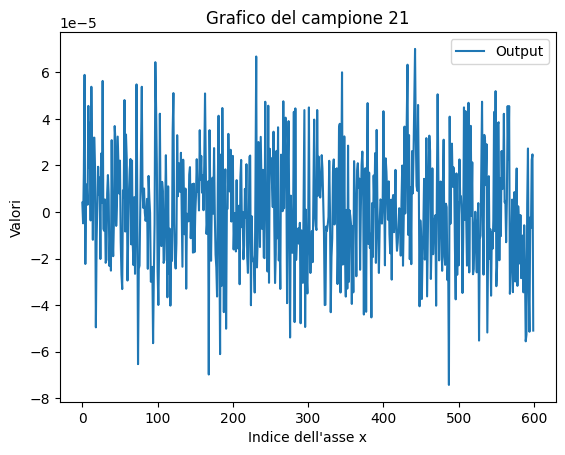

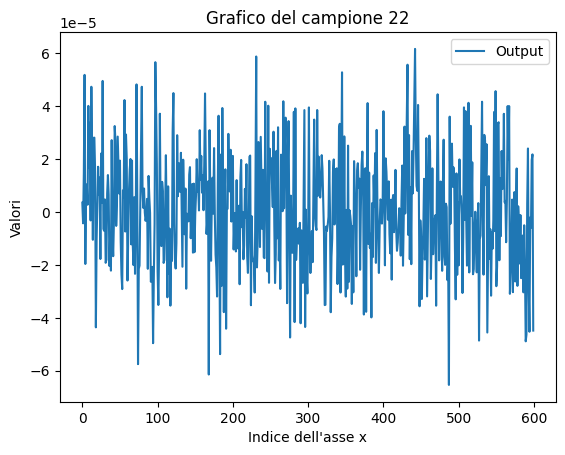

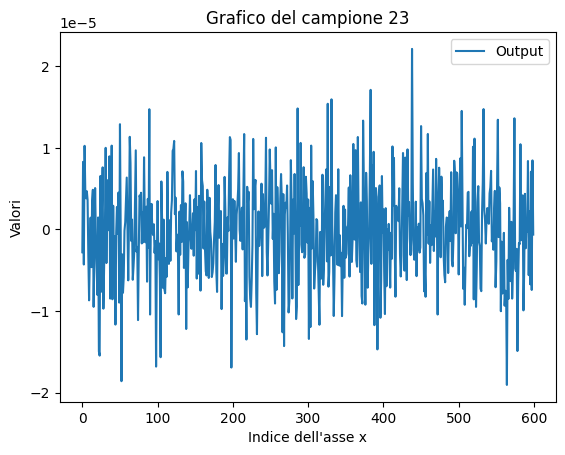

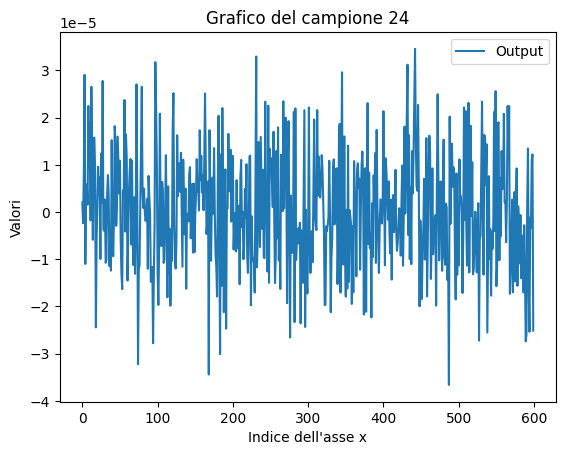

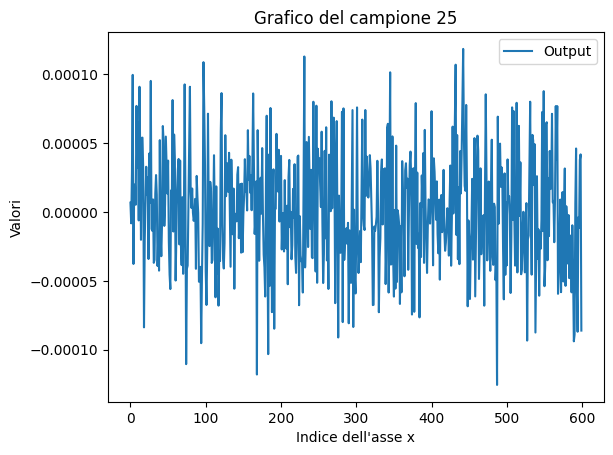

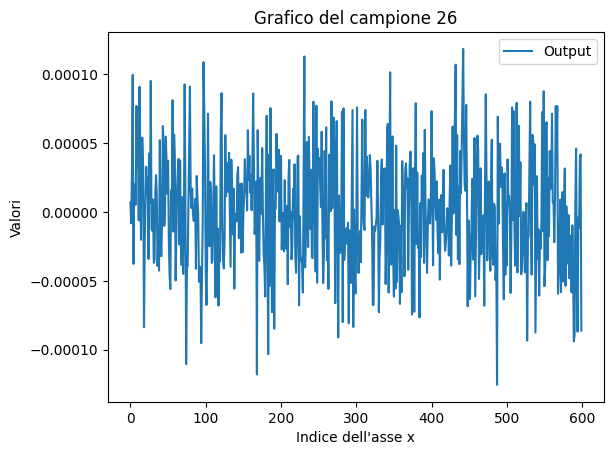

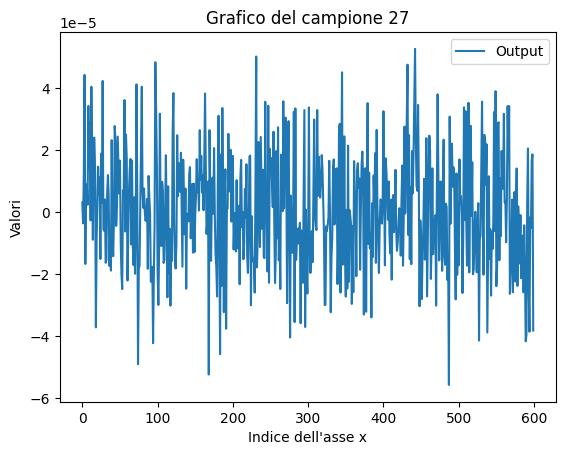

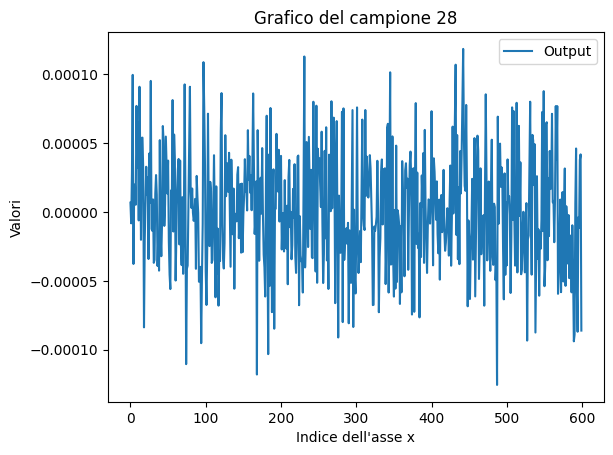

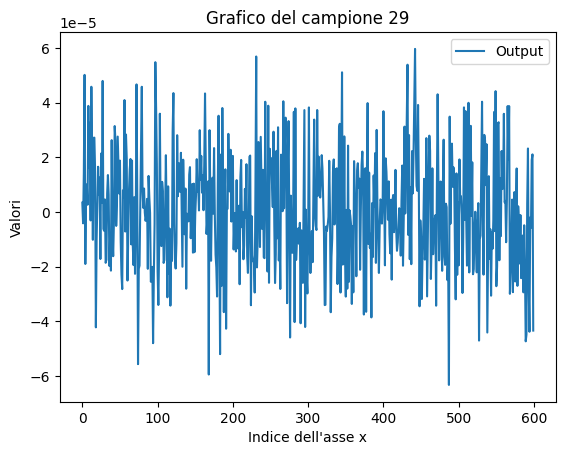

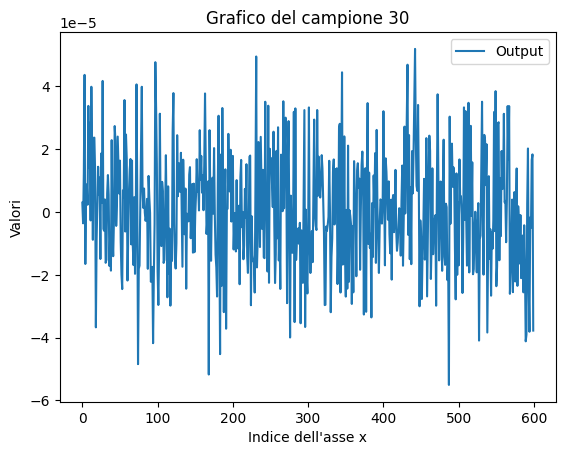

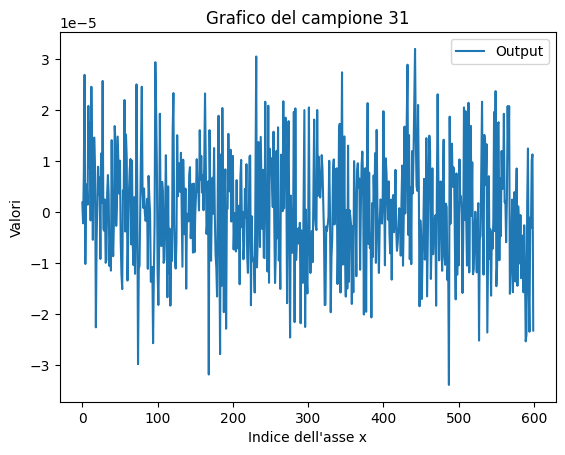

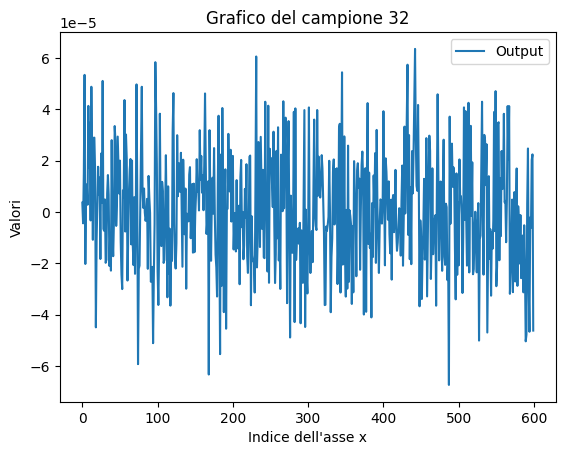

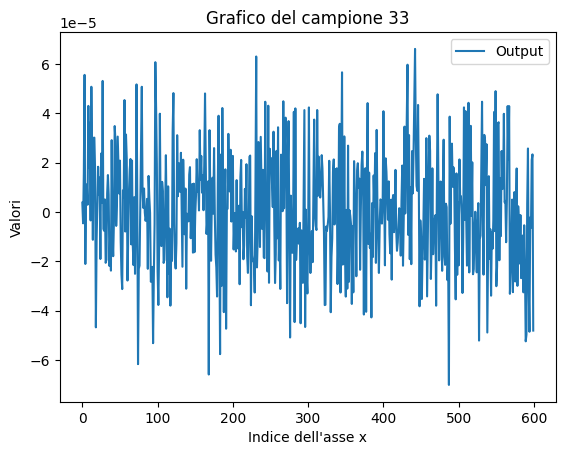

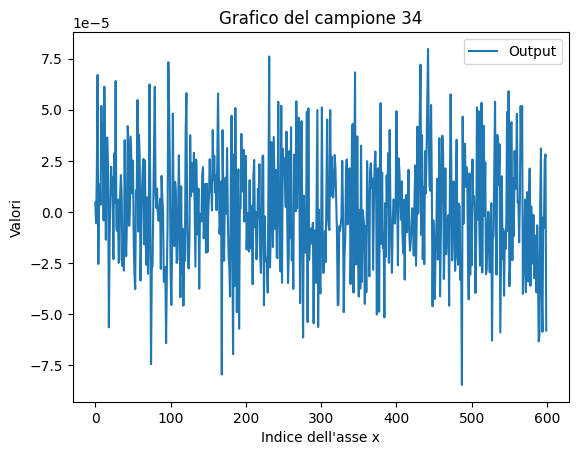

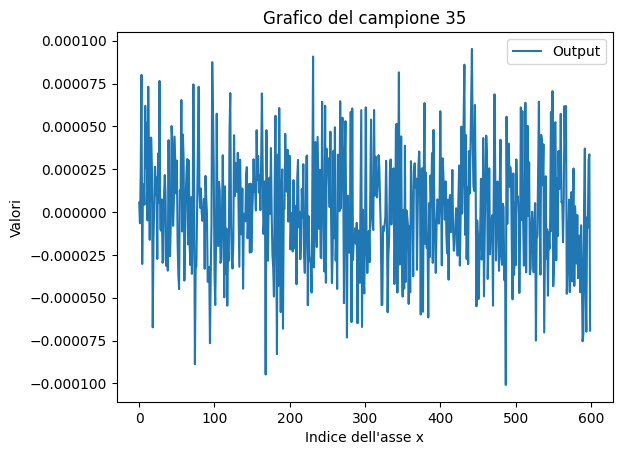

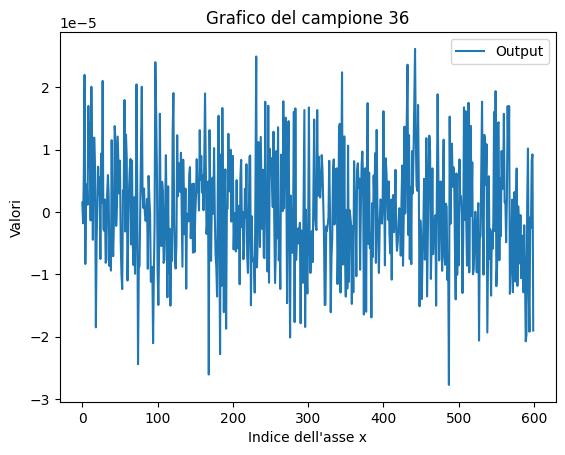

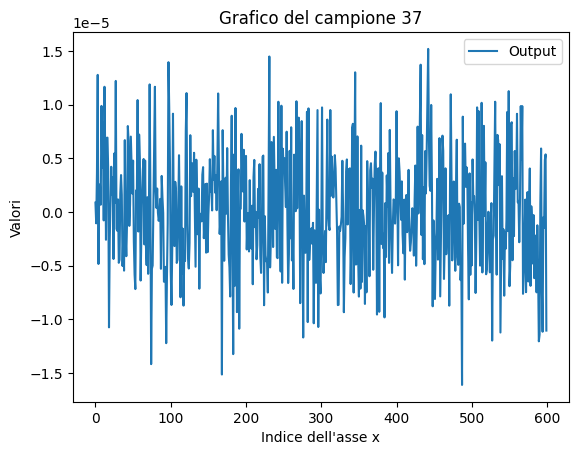

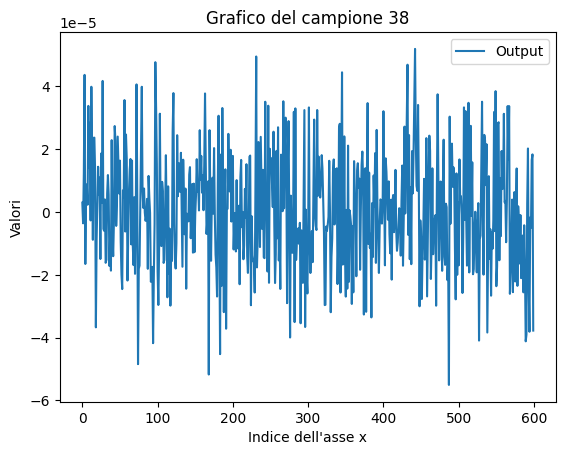

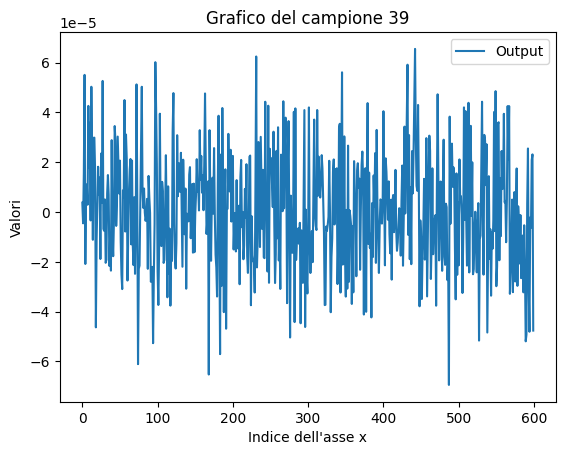

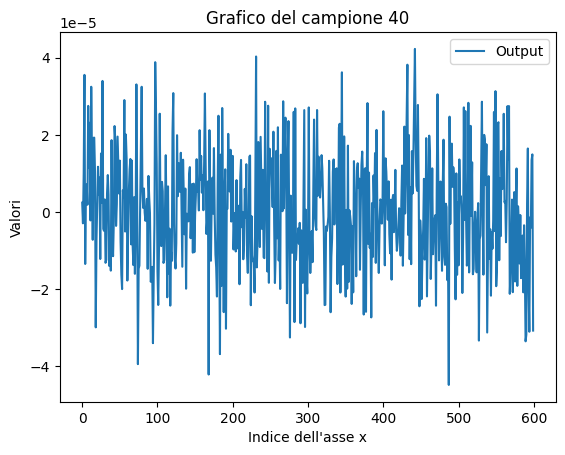

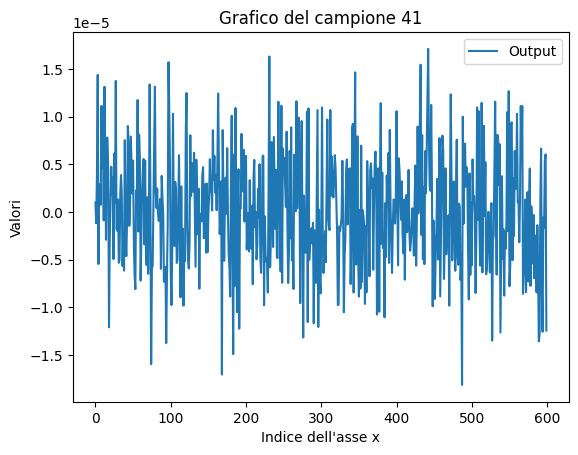

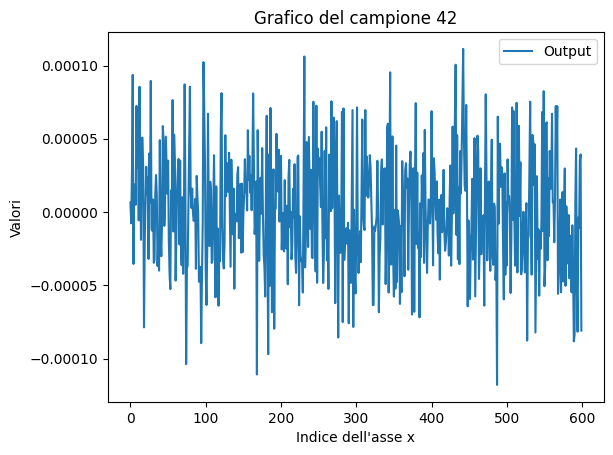

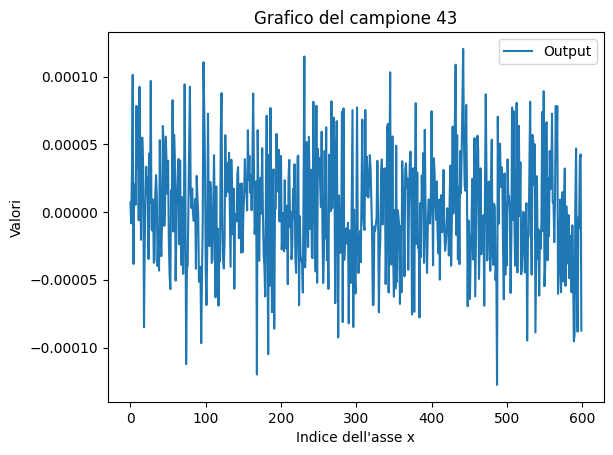

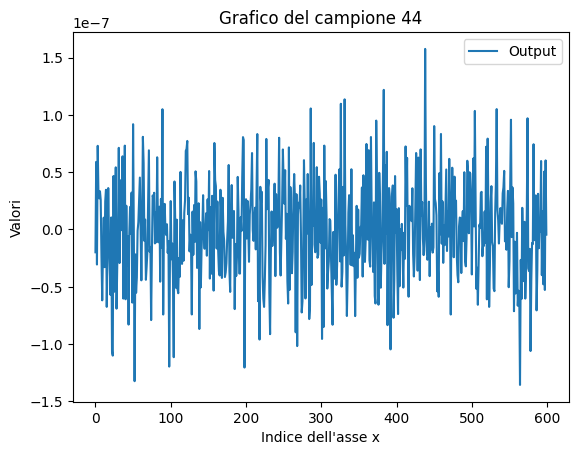

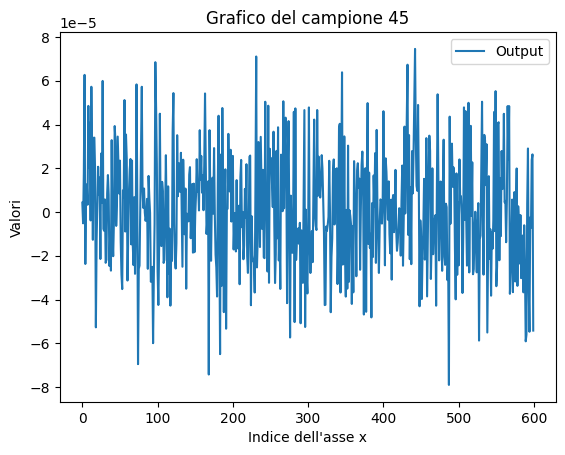

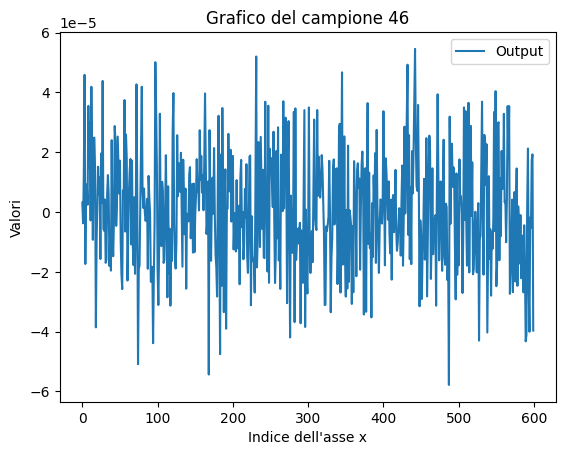

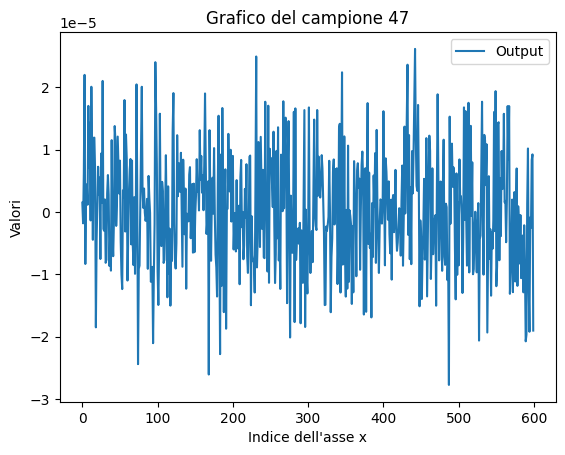

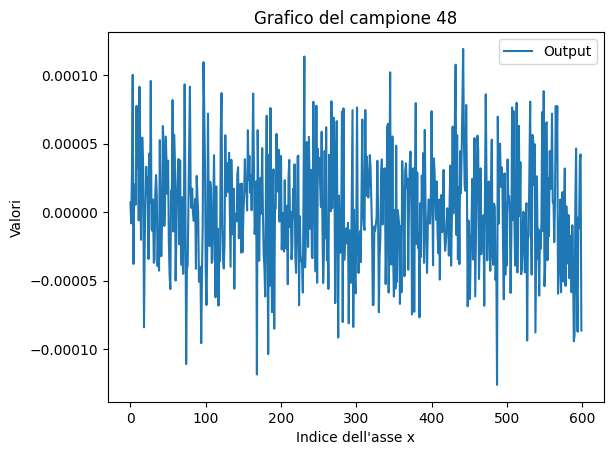

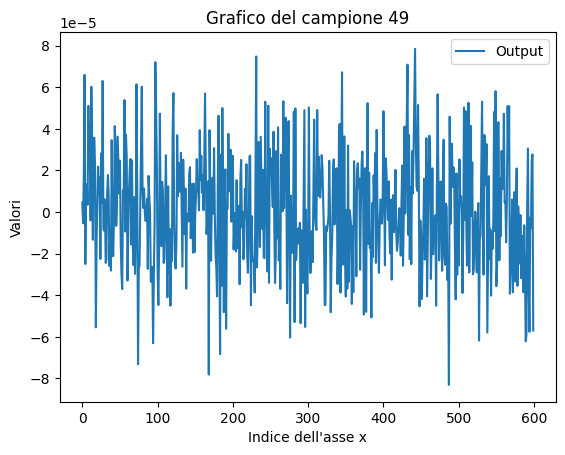

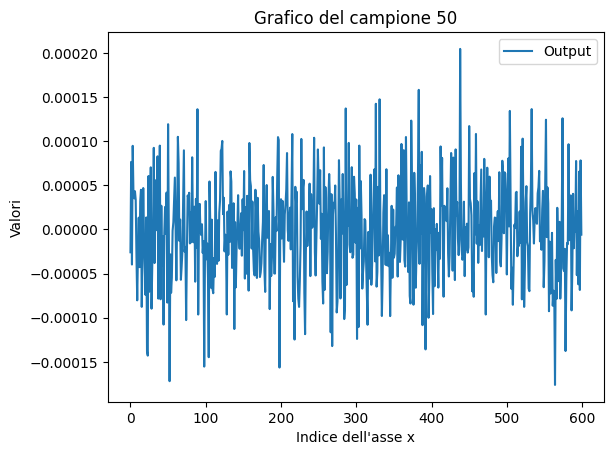

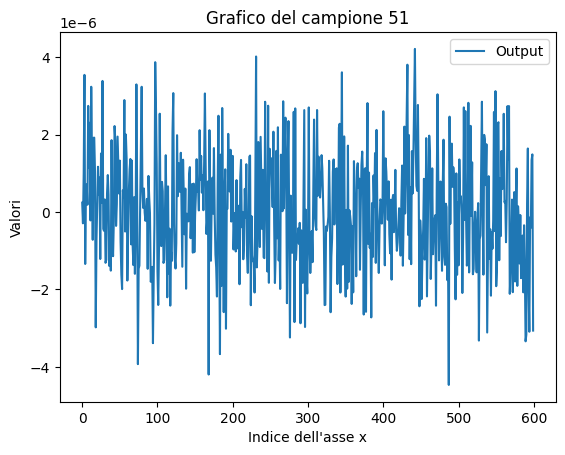

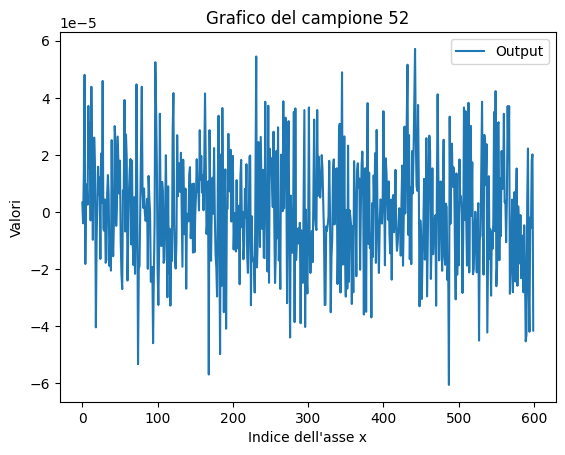

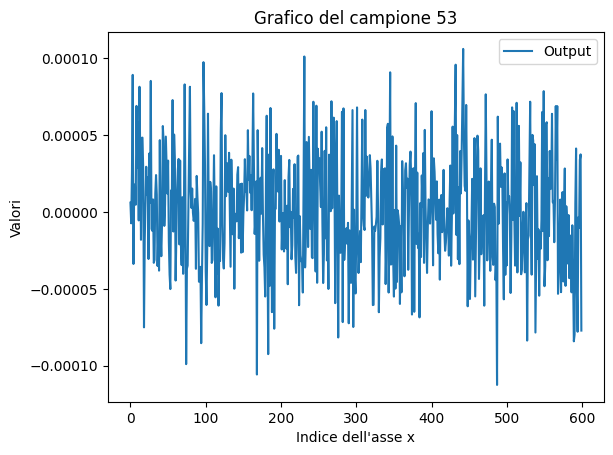

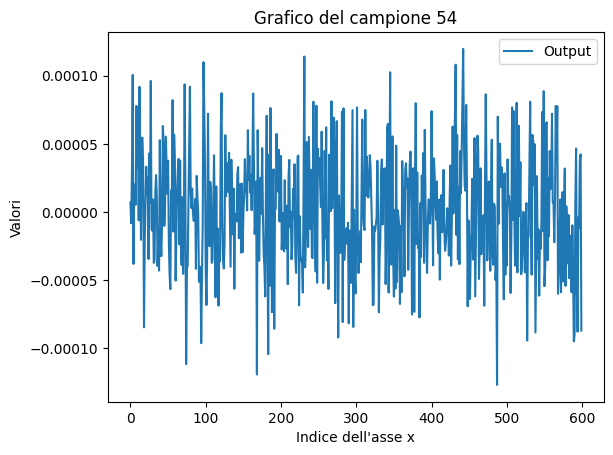

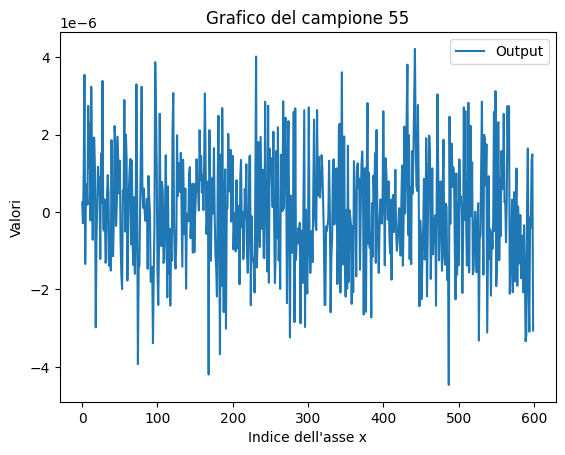

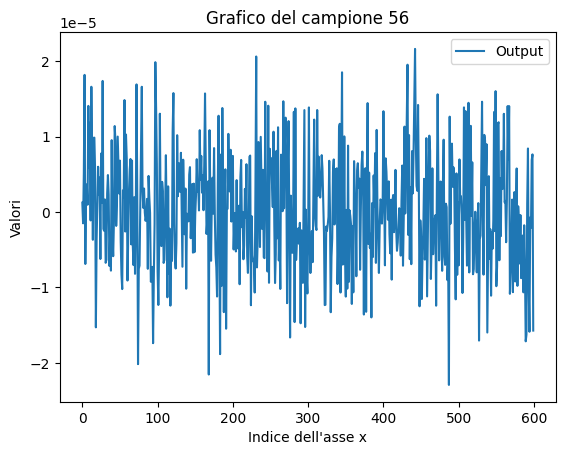

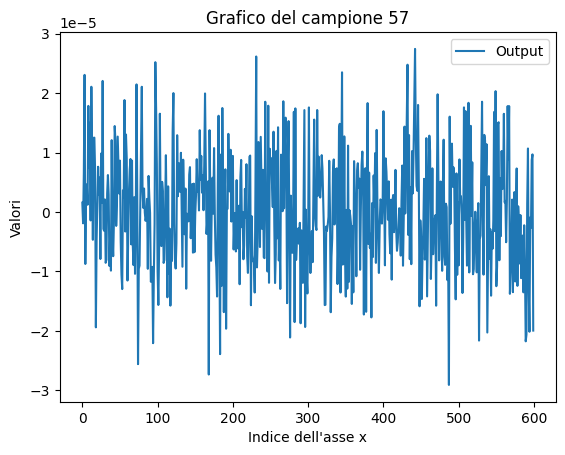

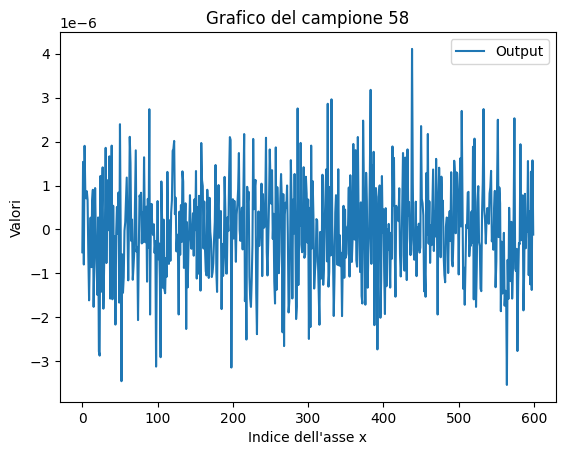

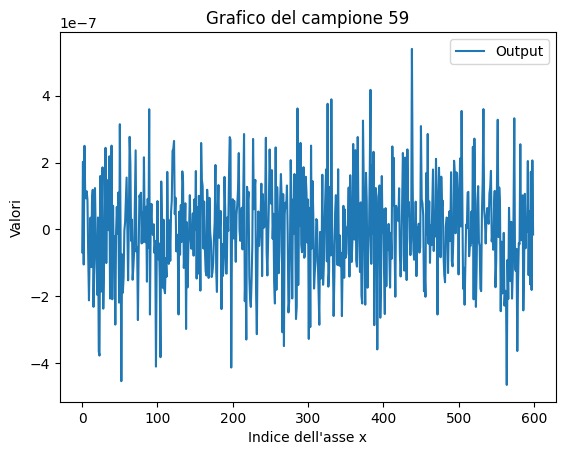

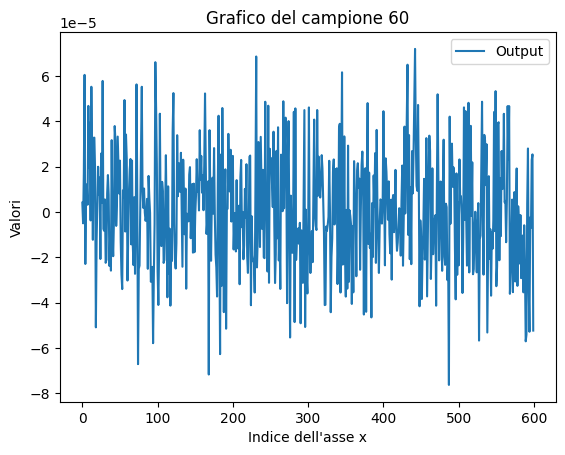

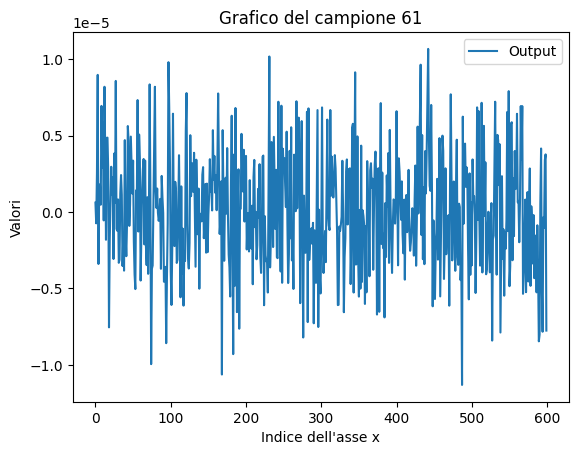

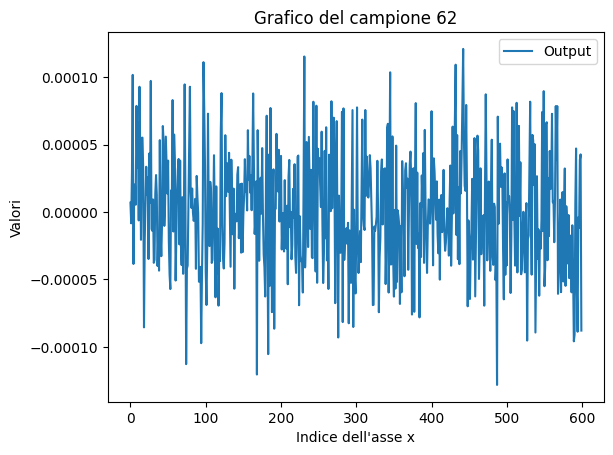

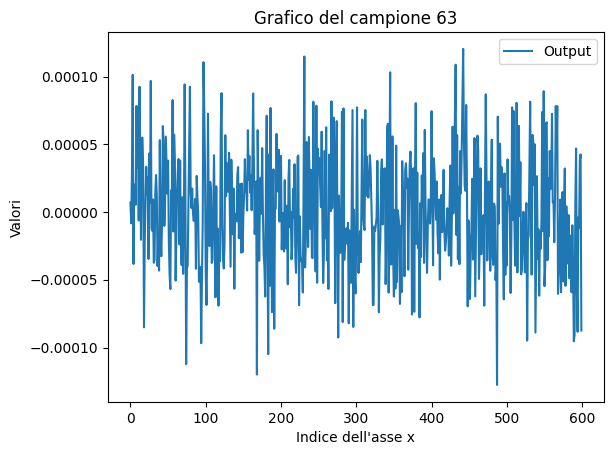

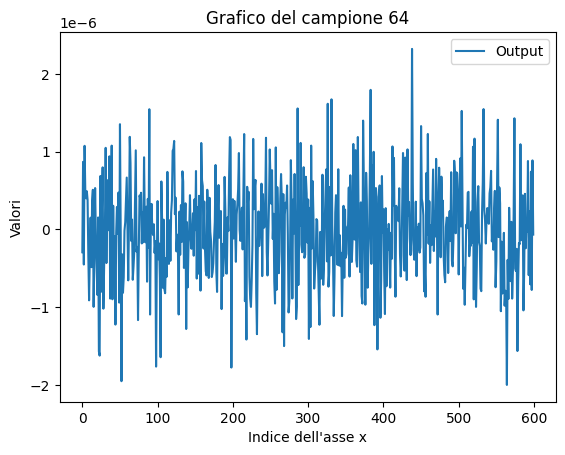

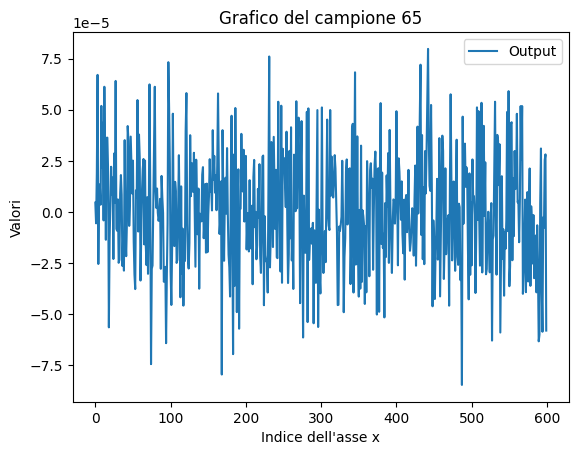

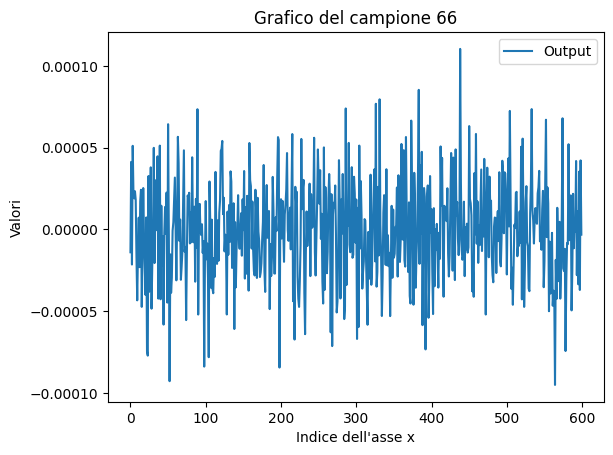

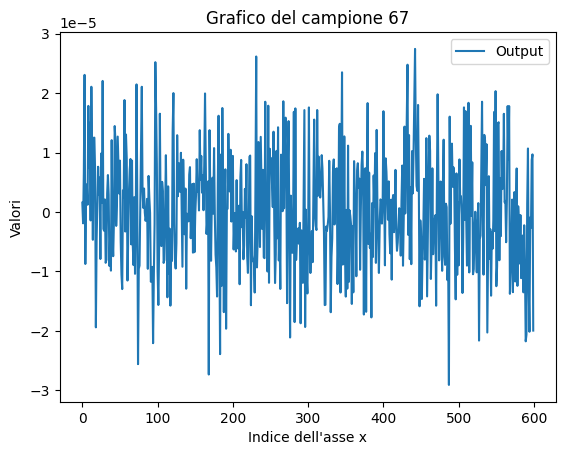

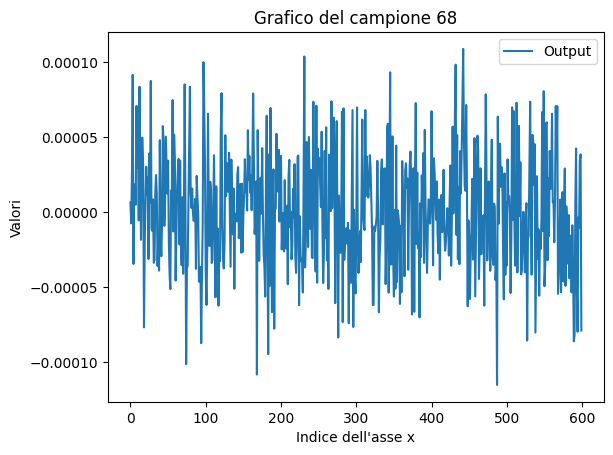

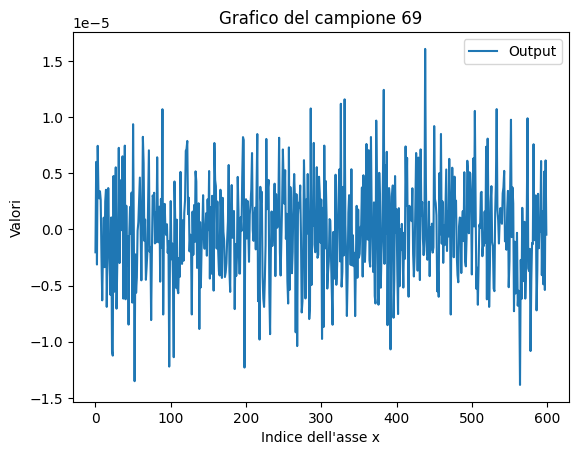

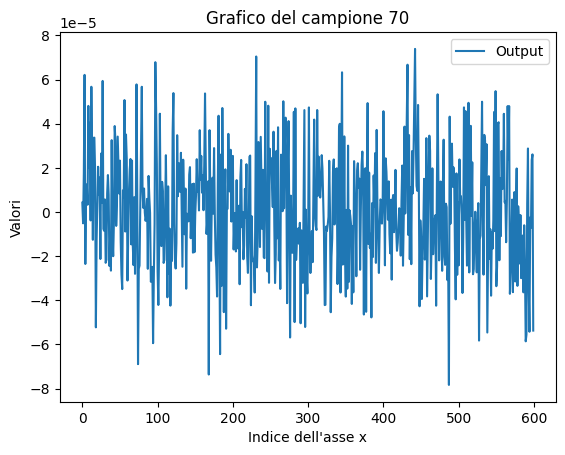

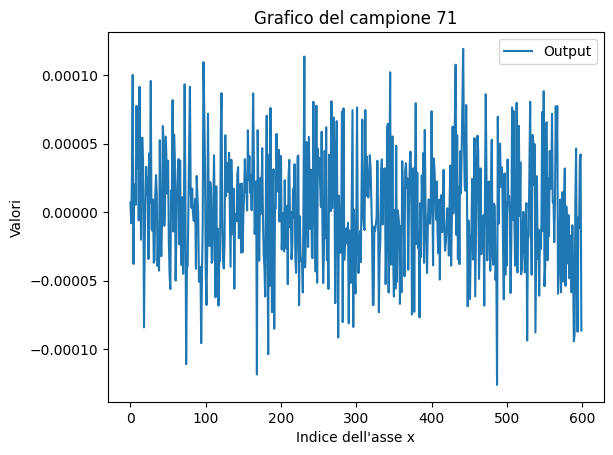

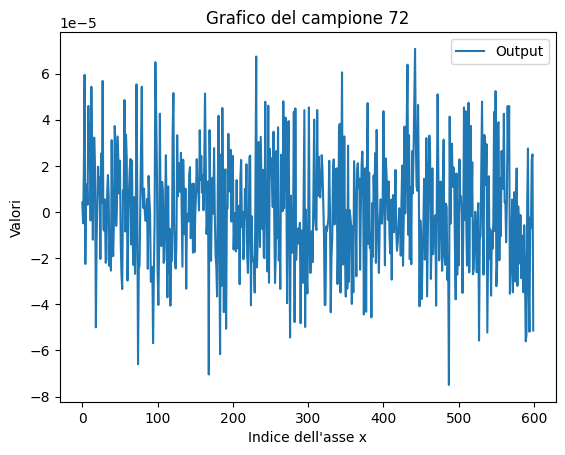

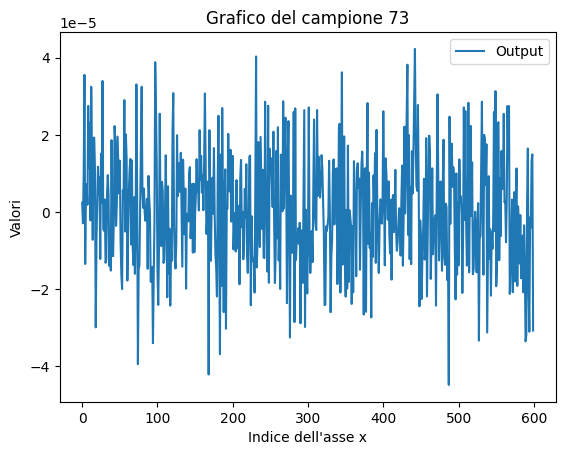

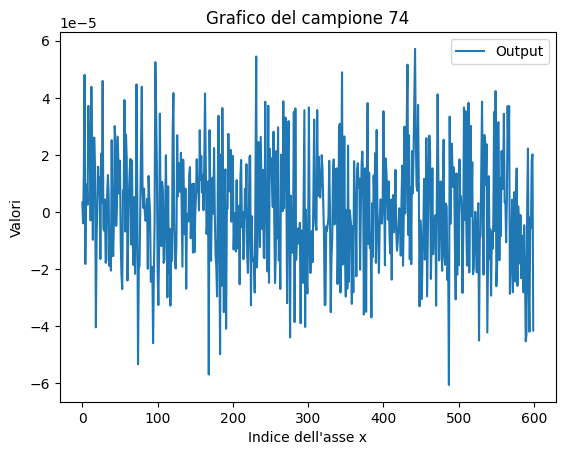

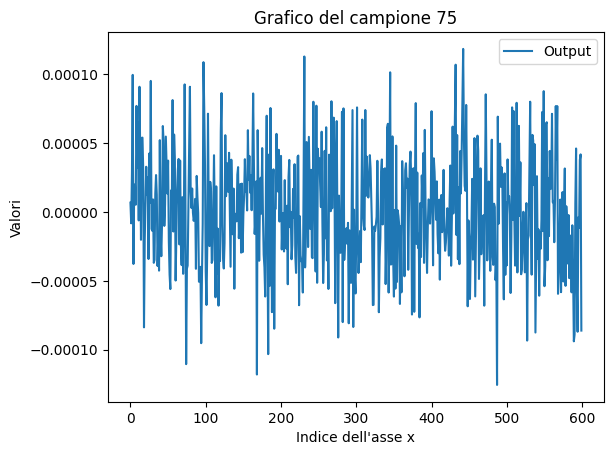

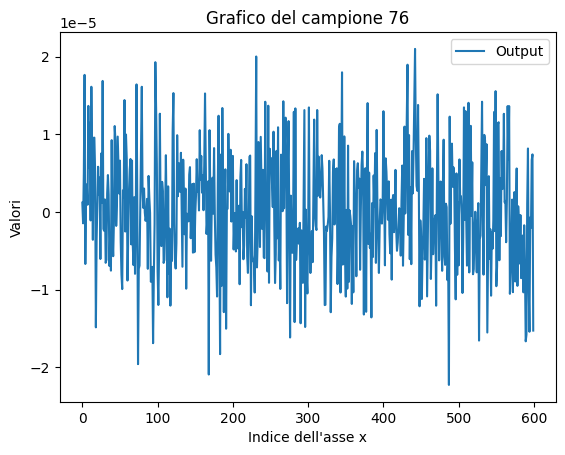

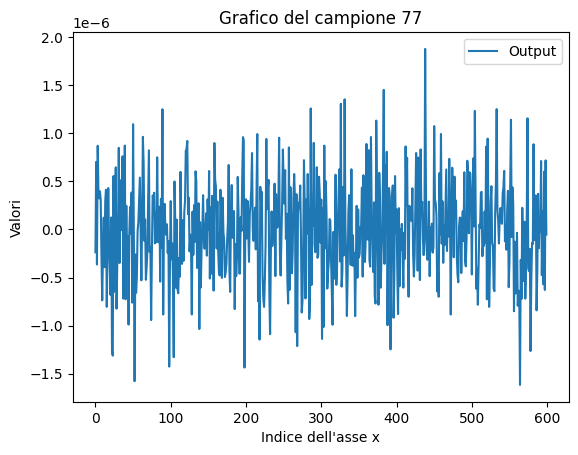

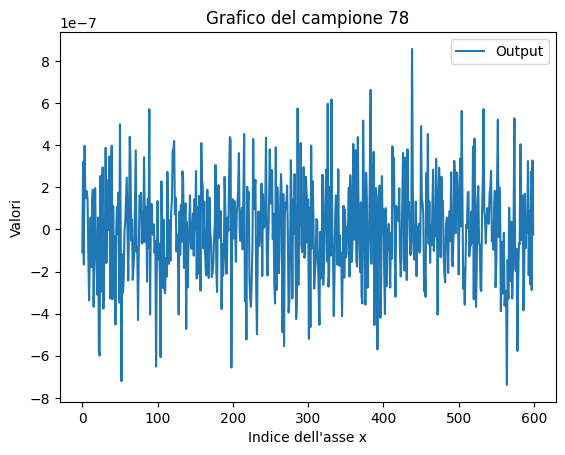

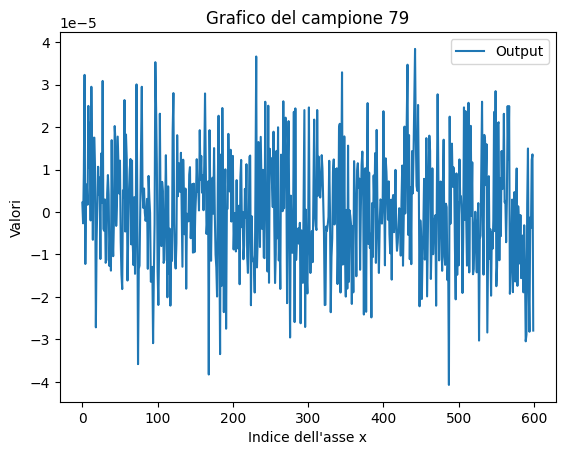

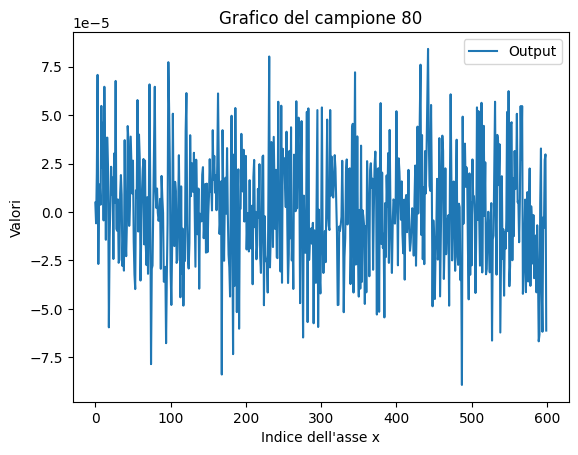

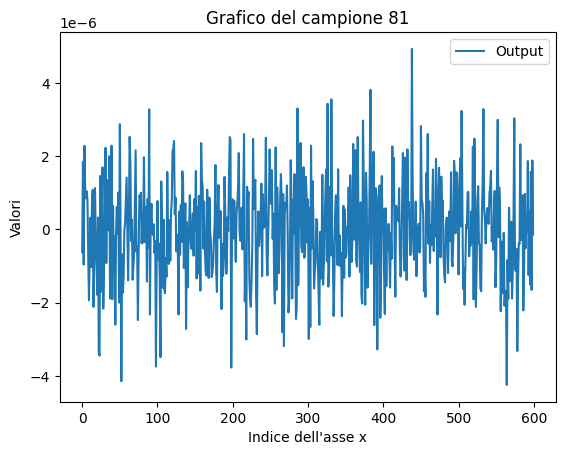

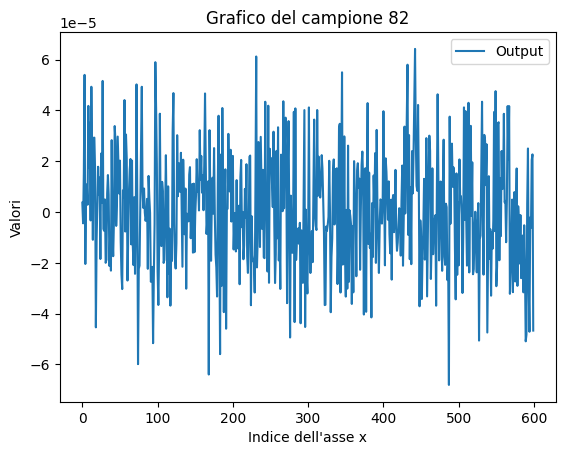

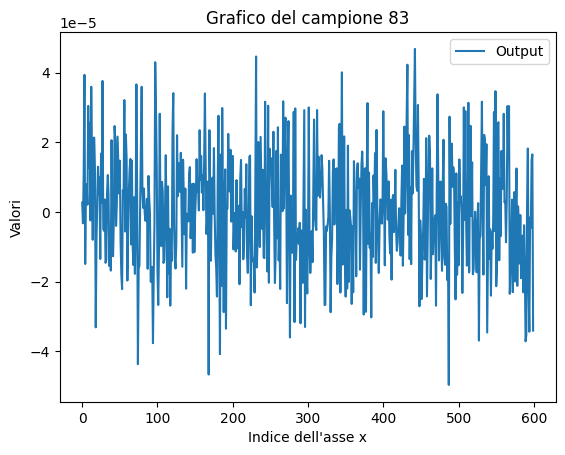

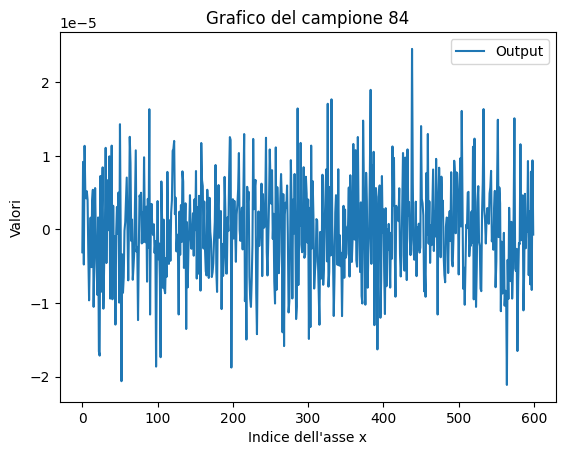

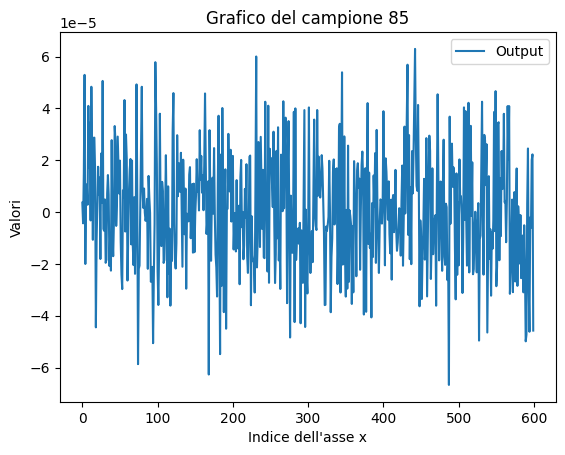

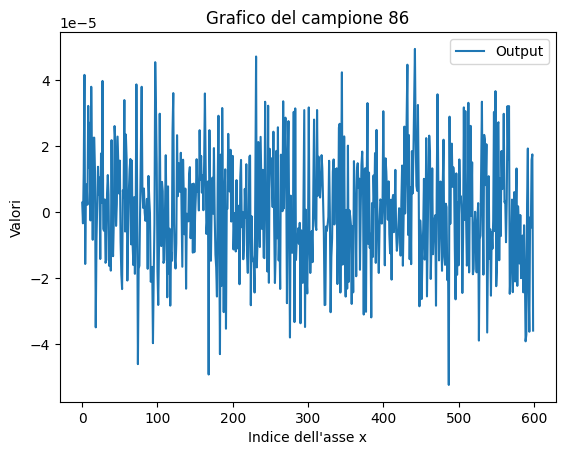

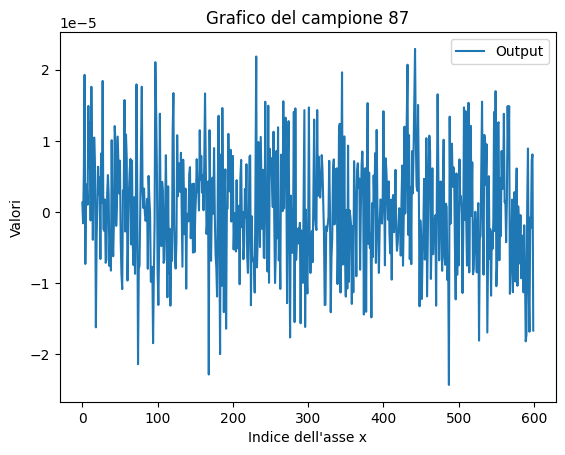

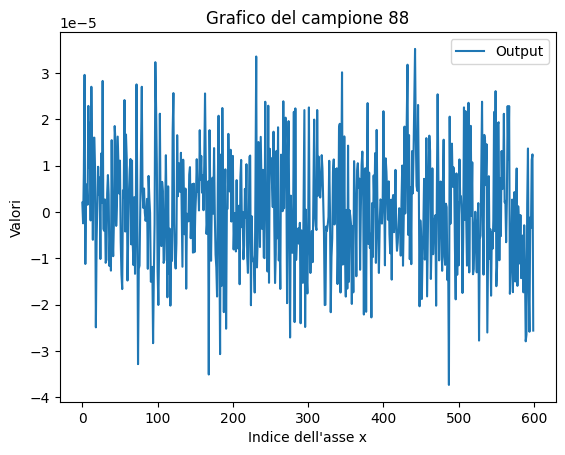

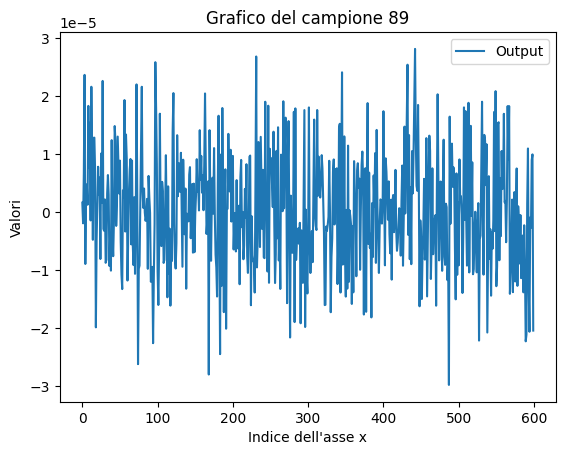

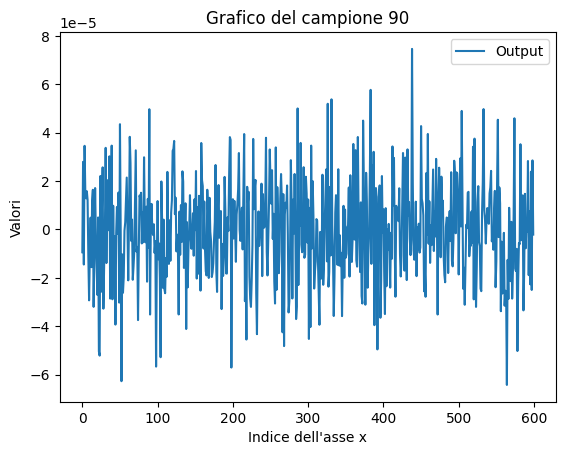

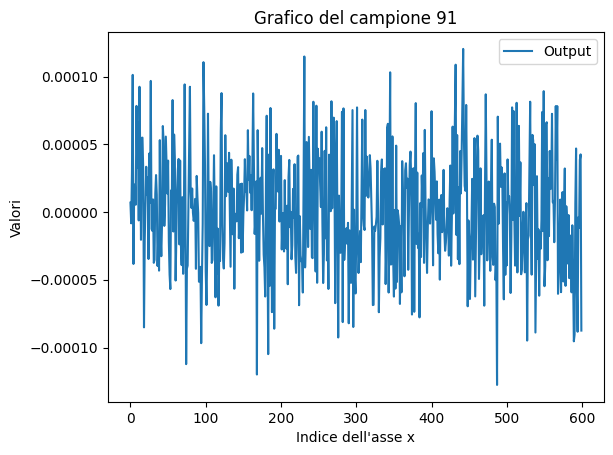

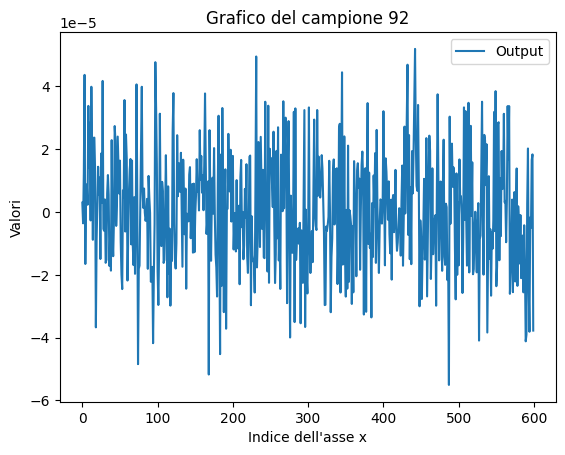

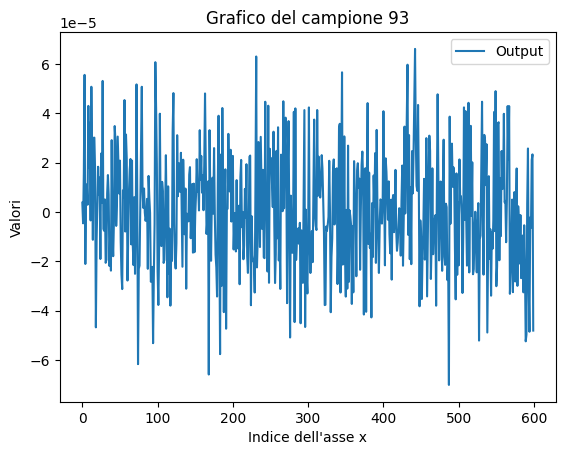

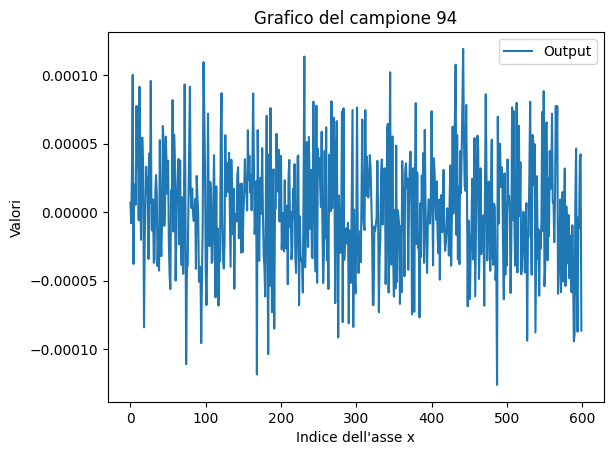

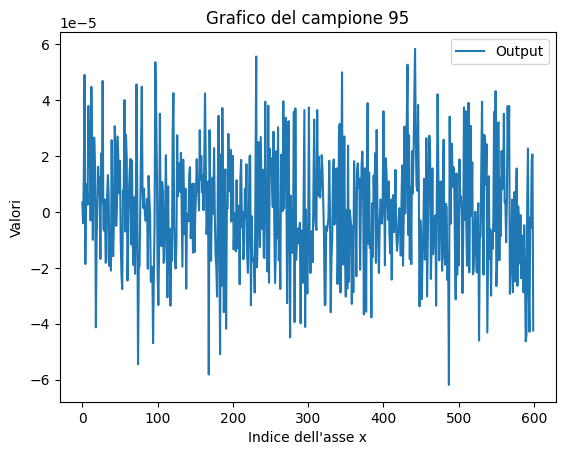

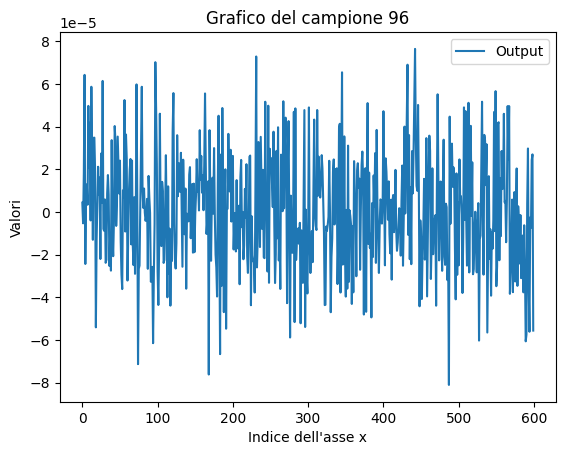

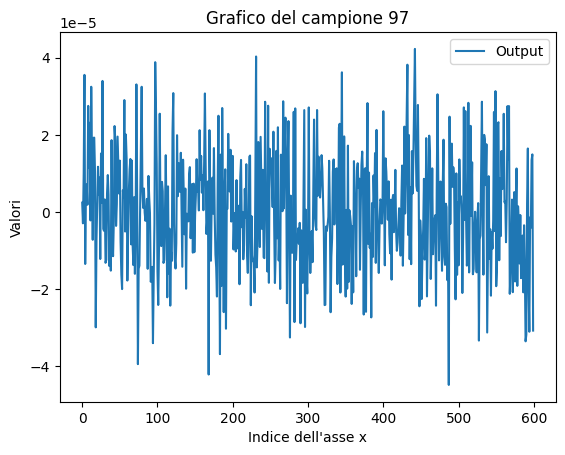

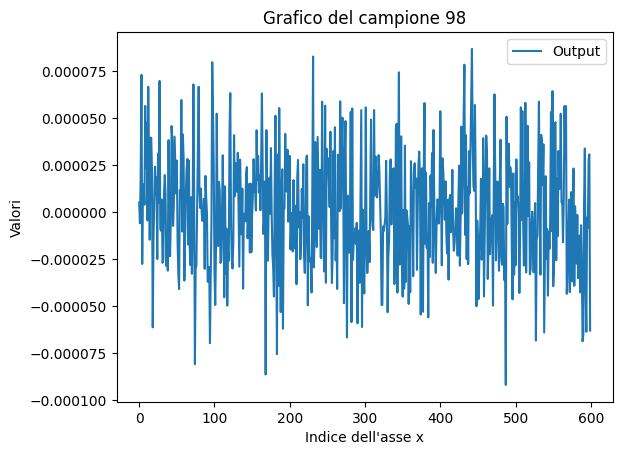

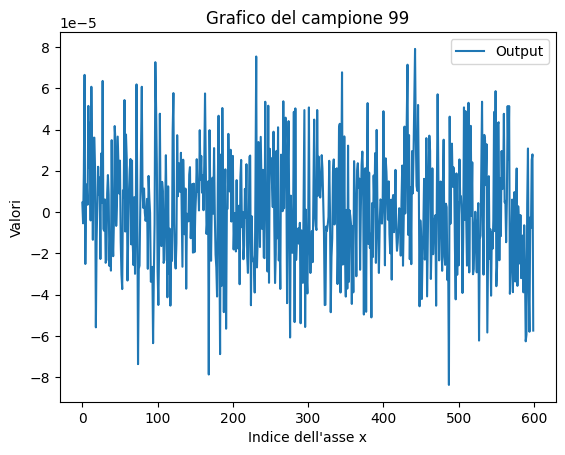

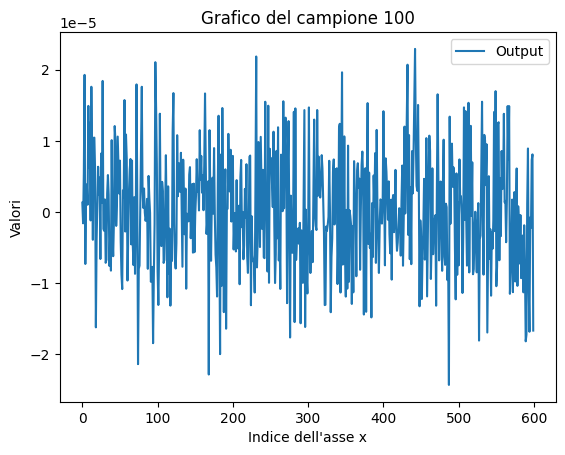

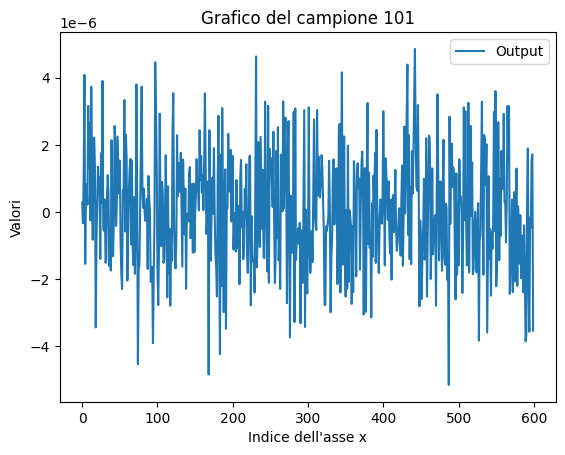

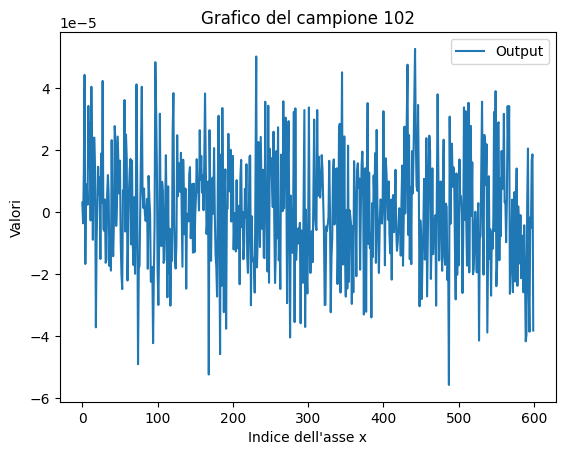

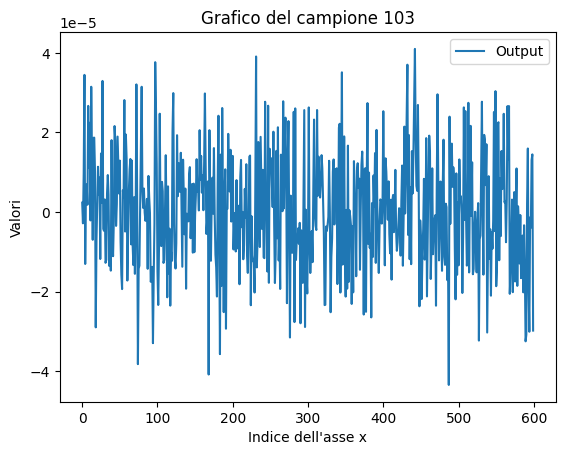

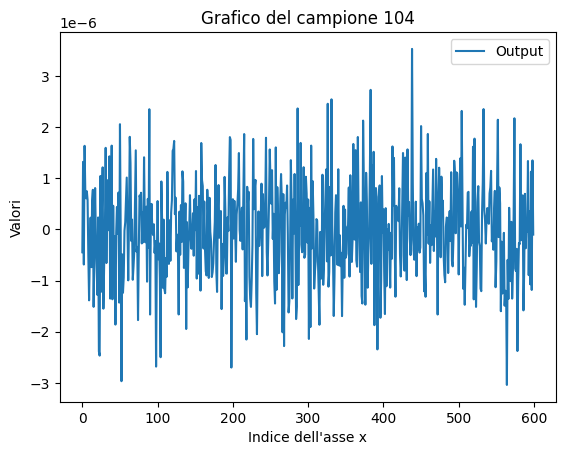

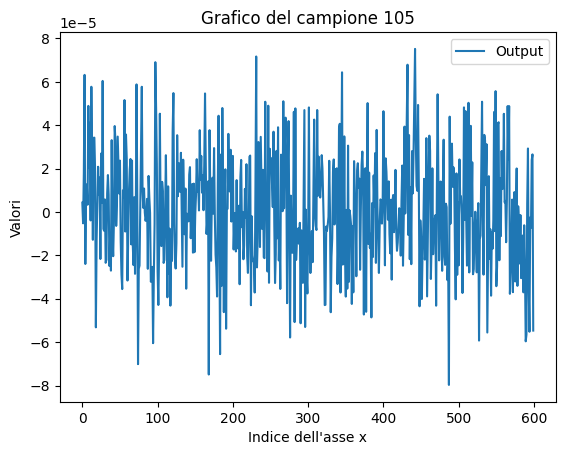

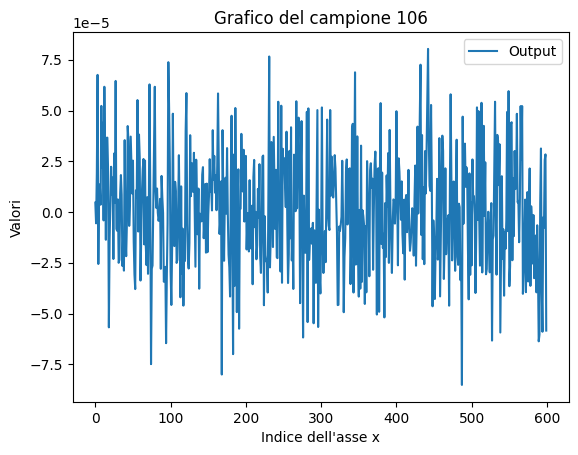

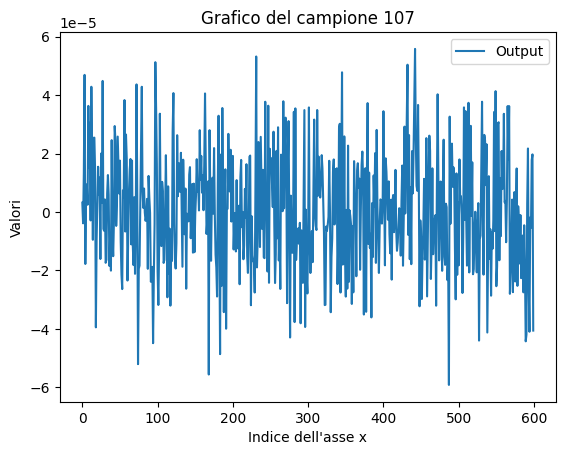

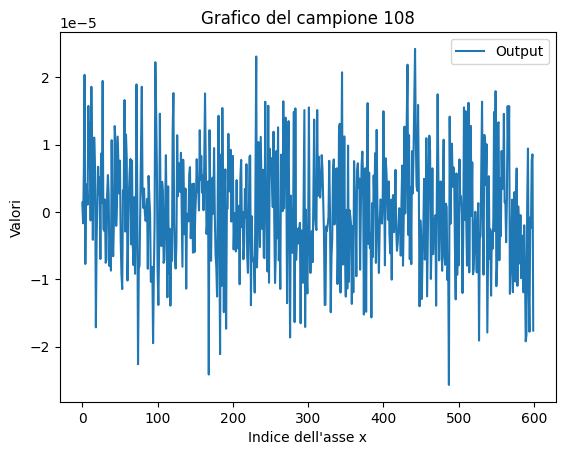

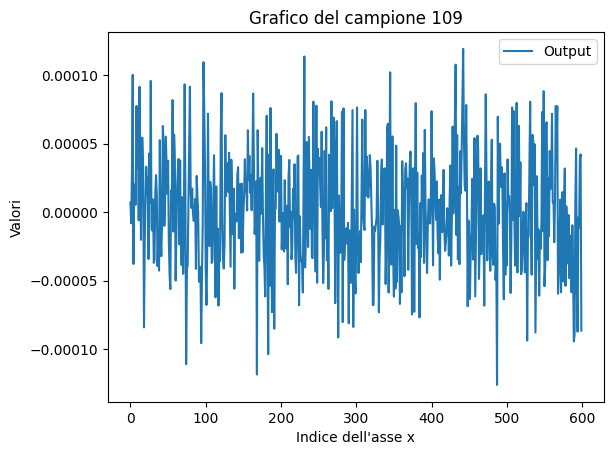

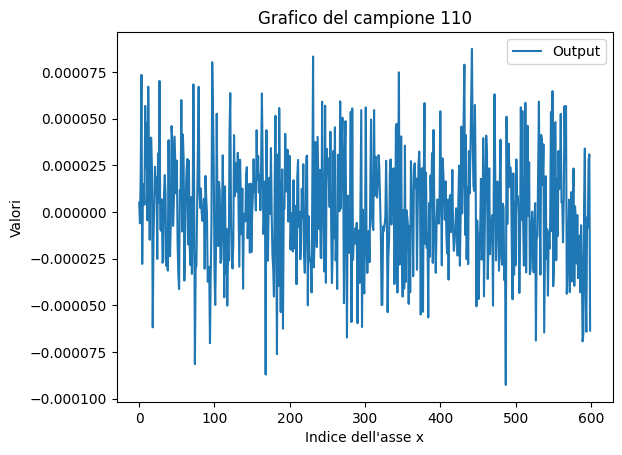

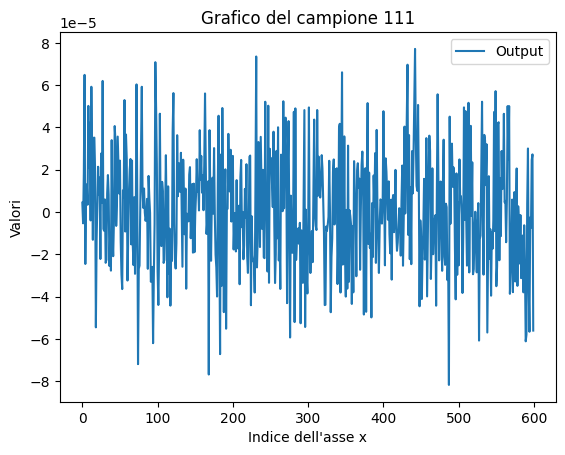

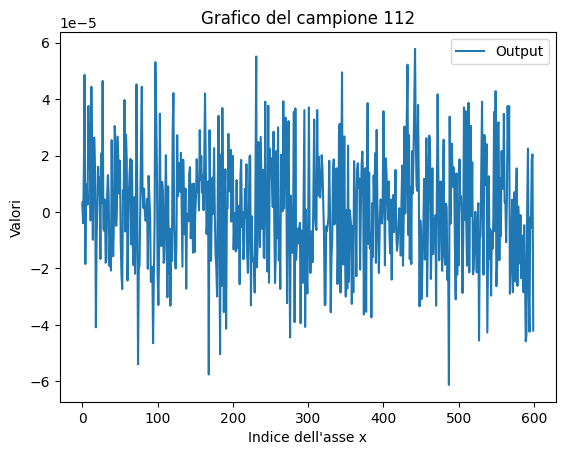

KeyboardInterrupt: 

In [ ]:
output=np.load("output.npy",allow_pickle=True)
target=np.load("target.npy")
target = np.transpose(target, (0, 2, 1))
print(target)
print(output)

for i in range(output.shape[0]):
    #plt.plot(target[i, 0, :], label='Target')
    plt.plot(output[i, 0, :], label='Output')
    plt.xlabel('Indice dell\'asse x')
    plt.ylabel('Valori')
    plt.title('Grafico del campione {}'.format(i+1))
    plt.legend()
    plt.show()
print(output.shape)
print(target.shape)